<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_06_Decision_Trees_Ensemble_Methods_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Decision Trees & Ensemble Methods

In [4]:
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [3]:
! pip install scikit-learn

In [2]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.2 MB/s eta 0:00:00


## Part 1. Human Resources

The "Human_Resources.csv" dataset contains various features related to employees, such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent at the company, work accidents, promotions, salary, and whether the employee left the company within the last year (target variable)


<Axes: xlabel='left', ylabel='count'>

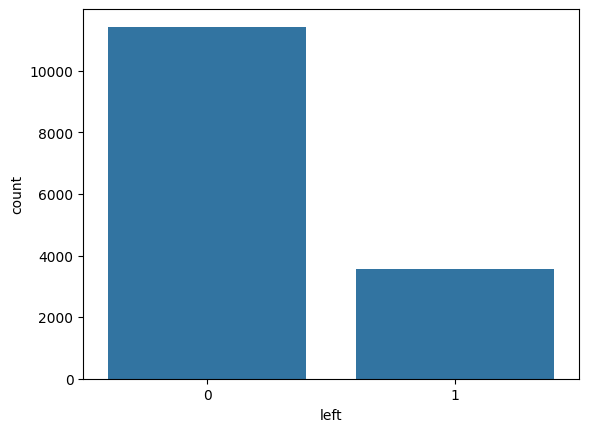

In [5]:
# Load the "Human_Resources.csv" dataset into a Pandas DataFrame.
dataset = pd.read_csv('/content/Human_Resources.csv')
dataset.head()


# Explore the dataset to understand its structure and characteristics.
dataset.describe()


#Check for missing values and handle them appropriately.
dataset.isnull().sum()
sns.countplot(x='left',data=dataset)


In [54]:
# Check for missing values
print("Missing values in Human Resources dataset:")
print(dataset.isnull().sum())

# Optionally fill or drop missing values
dataset.dropna(inplace=True)  # Drop rows with missing values (if any)


Missing values in Human Resources dataset:
age                    0
balance                0
day                    0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_f

In [6]:
# Perform feature engineering, such as encoding categorical variables (e.g., salary)
# and handling any necessary data transformations.
# one-hot encoding

dataset = pd.concat([dataset,pd.get_dummies(dataset['department'], prefix='department')],axis=1)
dataset.drop(['department'],axis=1, inplace=True)
dataset = pd.concat([dataset,pd.get_dummies(dataset['salary'], prefix='salary')],axis=1)
dataset.drop(['salary'],axis=1, inplace=True)

y = dataset['left'].values
X = dataset.drop(['left'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000, random_state=0)

print(X_test.shape)

# To avoid conversion warning:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform((X_train))
X_test = scaler.transform(X_test)




# Split the data into training and testing sets.



(4000, 20)


# Convert data to float to avoid warnings
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scale the data to have mean = 0 and standard deviation = 1
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Choose an appropriate machine learning algorithm for binary classification.
# Try the following models: Logistic Regression, Decision Trees
# Random Forest, Adaboost and Gradient Boosting).
model = LogisticRegression()
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear']}

             ]

grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


# Train the model on the training data.

Best accuracy :  0.7887085038653934
Best parameters : {'C': np.float64(100.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3082
           1       0.58      0.35      0.44       918

    accuracy                           0.79      4000
   macro avg       0.70      0.64      0.65      4000
weighted avg       0.77      0.79      0.77      4000

[[2847  235]
 [ 597  321]]
79.2


### **🔄 Beginner Explanation - Choosing and Training a Machine Learning Model**

---

#### **🔍 Choosing the Machine Learning Model (Logistic Regression)**

```python
model = LogisticRegression()
```

**What this does:**

* You are **choosing** **Logistic Regression** as your machine learning model.
* This is a **binary** classification model, meaning it is good for predicting **two** possible outcomes:

  * **Left (1)** - The employee **left** the company.
  * **Stayed (0)** - The employee **stayed** at the company.

---

#### **📝 Setting Up Hyperparameter Tuning (Grid Search)**

```python
paramaters = [
    {'C': np.arange(0.001, 1000, 100), 'solver': ['liblinear']}
]
```

**What this does:**

* **Logistic Regression** has **hyperparameters** that control how the model **learns**.
* Here, you are **testing** different values for the **`C`** parameter and **`solver`** option.

---

**🔹 `C` Parameter:**

* Controls the **strength** of the **regularization**.
* **Small** values of **`C`** = **strong** regularization (simpler model).
* **Large** values of **`C`** = **weak** regularization (more complex model).

**🔹 `solver`:**

* **`liblinear`** is a solver that is **efficient** for **small** datasets and **binary** classification problems.

---

#### **🔎 Performing the Grid Search (Finding the Best Model)**

```python
grid_search = GridSearchCV(estimator=model,
                           param_grid=paramaters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
```

**What this does:**

* **`GridSearchCV`** is a tool that **automatically** tests **many** combinations of **hyperparameters** to find the **best** model.
* **`cv=5`** means the data is split into **5** parts (**folds**), and each part is used as a **test set** once.
* **`n_jobs=-1`** means it will use **all** available CPU cores to **speed up** the search.

---

#### **🏃 Running the Grid Search (Training the Model)**

```python
grid_search = grid_search.fit(X_train, y_train)
```

**What this does:**

* It **trains** the model with **every** combination of **`C`** and **`solver`**.
* It then **evaluates** each model on the **validation** set to find the **best** combination.

---

#### **🏆 Getting the Best Model and Parameters**

```python
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)
```

**What this does:**

* **Prints** the **best** accuracy found during the grid search.
* **Prints** the **best** hyperparameter settings that gave this accuracy.

---

#### **📊 Evaluating the Model (Test Set)**

```python
y_pred = grid_search.predict(X_test)
```

**What this does:**

* Uses the **best** model found to **predict** the **left** or **stayed** status for the **test** set.

---

#### **📋 Printing the Evaluation Metrics**

```python
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Prints** a detailed report of how well the model performed:

  * **Precision** - How many of the predicted **"left"** were actually **"left"**.
  * **Recall** - How many of the actual **"left"** cases were correctly predicted.
  * **F1-Score** - A balance between **precision** and **recall**.
  * **Accuracy** - Overall percentage of correct predictions.
* **Prints** the **confusion matrix**, which shows:

  * **True Positives (TP)** - Correctly predicted **"left"**.
  * **True Negatives (TN)** - Correctly predicted **"stayed"**.
  * **False Positives (FP)** - Predicted **"left"**, but actually **"stayed"**.
  * **False Negatives (FN)** - Predicted **"stayed"**, but actually **"left"**.

---



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

number_of_estimators = 50
complexity = 1.0  # Use a more reasonable value for C
cart = LogisticRegression(C=complexity, solver='liblinear', max_iter=500)

lregbagging = BaggingClassifier(estimator=cart, n_estimators=number_of_estimators, n_jobs=-1)

lregbagging.fit(X_train, y_train)

y_pred = lregbagging.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3082
           1       0.57      0.34      0.43       918

    accuracy                           0.79      4000
   macro avg       0.70      0.63      0.65      4000
weighted avg       0.77      0.79      0.77      4000

[[2846  236]
 [ 604  314]]
79.0


### **🔄 Beginner Explanation - Bagging with Logistic Regression**

---

#### **📝 Importing the Required Libraries**

```python
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
```

**What this does:**

* **`LogisticRegression`** - The base machine learning model you are going to **combine** using **Bagging**.
* **`BaggingClassifier`** - An **ensemble** method that **combines** multiple copies of the **same** model to create a **stronger** overall model.

---

#### **🔢 Setting Up the Base Model (Logistic Regression)**

```python
number_of_estimators = 50
complexity = 1.0  # Use a more reasonable value for C
cart = LogisticRegression(C=complexity, solver='liblinear', max_iter=500)
```

**What this does:**

* **Creates** a **Logistic Regression** model with the following settings:

  * **`C=1.0`** - Regularization strength. Lower values = **simpler** models, higher values = **more complex** models.
  * **`solver='liblinear'`** - An **efficient** algorithm for smaller datasets and **binary** classification problems.
  * **`max_iter=500`** - Allows the algorithm to take **more** steps to find the **best** model.

---

#### **🗂️ Creating the Bagging Model**

```python
lregbagging = BaggingClassifier(estimator=cart, n_estimators=number_of_estimators, n_jobs=-1)
```

**What this does:**

* **Wraps** the **Logistic Regression** model in a **BaggingClassifier** to **reduce** variance and improve **stability**.
* **Key Parameters:**

  * **`estimator=cart`** - The **base** model to **bag** (combine).
  * **`n_estimators=50`** - Uses **50** **separate** Logistic Regression models.
  * **`n_jobs=-1`** - Use **all** available CPU cores to speed up training.

---

#### **🏃 Training the Bagging Model**

```python
lregbagging.fit(X_train, y_train)
```

**What this does:**

* Trains **50** different **Logistic Regression** models on **random** subsets of the training data.
* Each model gets a **slightly** different version of the training data to **reduce** overfitting.

---

#### **📊 Making Predictions**

```python
y_pred = lregbagging.predict(X_test)
```

**What this does:**

* Uses the **combined** output from the **50** models to make **final** predictions on the **test** data.
* The final prediction is the **majority vote** (e.g., if 30 out of 50 models predict **"left"**, the final output is **"left"**).

---

#### **📋 Evaluating the Model**

```python
print(classification_report(y_test, y_pred))
```

**What this does:**

* **Prints** a detailed report of how well the model performed:

  * **Precision** - How many of the predicted **"left"** were actually **"left"**.
  * **Recall** - How many of the actual **"left"** cases were correctly predicted.
  * **F1-Score** - A balance between **precision** and **recall**.
  * **Accuracy** - Overall percentage of correct predictions.

---

#### **🗂️ Printing the Confusion Matrix**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
```

**What this does:**

* **Prints** the **confusion matrix**, which shows:

  * **True Positives (TP)** - Correctly predicted **"left"**.
  * **True Negatives (TN)** - Correctly predicted **"stayed"**.
  * **False Positives (FP)** - Predicted **"left"**, but actually **"stayed"**.
  * **False Negatives (FN)** - Predicted **"stayed"**, but actually **"left"**.

---

#### **✅ Printing the Final Accuracy**

```python
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Calculates** the **overall** percentage of correct predictions.
* **Multiplies** by **100** to show the accuracy as a **percentage**.

---

#### **🔑 Key Points to Remember:**

* **Bagging** is a way to **reduce** the **variance** of a model by combining **multiple** versions of it.
* It **works best** when the base model has **high** variance (like **Decision Trees**), but it can still **stabilize** a **Logistic Regression** model.
* **Bagging** can **help** if your model is **overfitting** to the training data.



In [9]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Decision Tree Classifier
DTclassifier = DecisionTreeClassifier(class_weight='balanced')
DTclassifier.fit(X_train, y_train)

# Predict on the test set
y_pred = DTclassifier.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))

# Print confusion matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

# Print accuracy
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3082
           1       0.93      0.97      0.95       918

    accuracy                           0.98      4000
   macro avg       0.96      0.97      0.97      4000
weighted avg       0.98      0.98      0.98      4000

[[3015   67]
 [  27  891]]
97.65


### **🔄 Beginner Explanation - Decision Tree Classifier**

---

#### **🌱 Importing the Required Libraries**

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
```

**What this does:**

* **`DecisionTreeClassifier`** - The machine learning model you are using for **classification**.
* **`classification_report`** - Provides a **detailed** report on the model’s performance.
* **`confusion_matrix`** - Shows the **true** and **false** predictions in a table.
* **`accuracy_score`** - Calculates the **overall** percentage of correct predictions.

---

#### **🌲 Creating and Training the Decision Tree Model**

```python
DTclassifier = DecisionTreeClassifier(class_weight='balanced')
DTclassifier.fit(X_train, y_train)
```

**What this does:**

* **Creates** a **Decision Tree** model with the following settings:

  * **`class_weight='balanced'`** - Adjusts the importance of each class to **handle** imbalanced data (e.g., **more** people **stay** than **leave**).
* **Trains** the decision tree on the **training** data.
* The model **learns** to **split** the data based on the **most important** features that **separate** the **"left"** and **"stayed"** classes.

---

#### **📝 Making Predictions on the Test Set**

```python
y_pred = DTclassifier.predict(X_test)
```

**What this does:**

* Uses the **trained** decision tree to make **predictions** on the **test** set.
* It will **predict** either **"left"** (**1**) or **"stayed"** (**0**) for each employee in the **test** data.

---

#### **📋 Printing the Evaluation Metrics**

```python
print(classification_report(y_test, y_pred))
```

**What this does:**

* **Prints** a detailed report on how well the model performed:

  * **Precision** - How many of the predicted **"left"** were actually **"left"**.
  * **Recall** - How many of the actual **"left"** cases were correctly predicted.
  * **F1-Score** - A balance between **precision** and **recall**.
  * **Accuracy** - Overall percentage of correct predictions.

---

#### **🗂️ Printing the Confusion Matrix**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
```

**What this does:**

* **Prints** the **confusion matrix**, which shows:

  * **True Positives (TP)** - Correctly predicted **"left"**.
  * **True Negatives (TN)** - Correctly predicted **"stayed"**.
  * **False Positives (FP)** - Predicted **"left"**, but actually **"stayed"**.
  * **False Negatives (FN)** - Predicted **"stayed"**, but actually **"left"**.

---

**Example Confusion Matrix:**

```
[[TN, FP],  
 [FN, TP]]
```

* **Top Left (TN)** - Correctly predicted **"stayed"**.
* **Top Right (FP)** - Wrongly predicted **"left"**.
* **Bottom Left (FN)** - Wrongly predicted **"stayed"**.
* **Bottom Right (TP)** - Correctly predicted **"left"**.

---

#### **✅ Printing the Final Accuracy**

```python
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Calculates** the overall percentage of **correct** predictions.
* **Multiplies** by **100** to show the accuracy as a **percentage**.

---

#### **🔑 Key Points to Remember:**

* **Decision Trees** work by making a series of **yes/no** questions based on the **features** to **split** the data.
* They are **easy** to **interpret** but can **overfit** if not **pruned** or regularized.
* **Balanced** weights can help **correct** for class **imbalance**.

---

Would you like me to show you a quick **visual** example of how **decision trees** actually **make** these splits? 🙂


In [10]:
# Random Forest Classifier
number_of_trees = 500
max_number_of_features = 13

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features,class_weight='balanced')


RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)

# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)




[0.34641172 0.11923544 0.09081049 0.12768752 0.28552387 0.00214289
 0.00063545 0.001224   0.00140395 0.0014671  0.00148153 0.00077107
 0.00114003 0.00060944 0.00309095 0.00291625 0.00505764 0.00128938
 0.00437376 0.00272752]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3072   10]
 [  23  895]]
99.175


### **🔄 Beginner Explanation - Random Forest Classifier**

---

#### **🌳 What is a Random Forest?**

* A **Random Forest** is an **ensemble** method that **combines** multiple **Decision Trees** to make a **stronger** model.
* It is **more** **stable** and **accurate** than a single decision tree because it **averages** the results from **many** trees.

---

#### **📝 Creating the Random Forest Model**

```python
number_of_trees = 500
max_number_of_features = 13

RFCmodel = RandomForestClassifier(
    n_estimators=number_of_trees,
    max_features=max_number_of_features,
    class_weight='balanced'
)
```

**What this does:**

* **Creates** a **Random Forest** model with the following settings:

  * **`n_estimators=500`** - Use **500** separate **decision trees**.
  * **`max_features=13`** - Use **13** features per tree to make the **splits**.
  * **`class_weight='balanced'`** - Adjusts the **importance** of each class to **handle** imbalanced data.

---

#### **🌱 Training the Random Forest Model**

```python
RFCmodel.fit(X_train, y_train)
```

**What this does:**

* Trains the **500** decision trees using the **training** data.
* Each tree is trained on a **random** subset of the **rows** and **columns** to reduce **overfitting**.

---

#### **📊 Printing the Feature Importances**

```python
print(RFCmodel.feature_importances_)
```

**What this does:**

* **Prints** the **importance** of each feature in the model.
* Features with **higher** importance scores are **more** important for making predictions.

---

**Example Output:**

```
[0.15, 0.10, 0.05, 0.20, 0.25, 0.08, 0.17]
```

* **0.25** - This feature is the **most** important.
* **0.05** - This feature is the **least** important.

---

#### **📝 Making Predictions on the Test Set**

```python
y_pred = RFCmodel.predict(X_test)
```

**What this does:**

* Uses the **trained** Random Forest model to make **predictions** on the **test** set.
* It **averages** the predictions from the **500** trees to make a **final** prediction.

---

#### **📋 Printing the Evaluation Metrics**

```python
print(classification_report(y_test, y_pred))
```

**What this does:**

* **Prints** a detailed report of how well the model performed:

  * **Precision** - How many of the predicted **"left"** were actually **"left"**.
  * **Recall** - How many of the actual **"left"** cases were correctly predicted.
  * **F1-Score** - A balance between **precision** and **recall**.
  * **Accuracy** - Overall percentage of correct predictions.

---

#### **🗂️ Printing the Confusion Matrix**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
```

**What this does:**

* **Prints** the **confusion matrix**, which shows:

  * **True Positives (TP)** - Correctly predicted **"left"**.
  * **True Negatives (TN)** - Correctly predicted **"stayed"**.
  * **False Positives (FP)** - Predicted **"left"**, but actually **"stayed"**.
  * **False Negatives (FN)** - Predicted **"stayed"**, but actually **"left"**.

---

#### **✅ Printing the Final Accuracy**

```python
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Calculates** the **overall** percentage of correct predictions.
* **Multiplies** by **100** to show the accuracy as a **percentage**.

---

#### **🔑 Key Points to Remember:**

* **Random Forests** are great for **high-dimensional** data and are **less** likely to **overfit** than single decision trees.
* They **handle** **imbalanced** datasets better when using **`class_weight='balanced'`**.
* They provide **feature importance** scores, which can help you **understand** your data better.

---


In [11]:
# Adaboost

clf_adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=0.90)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3082
           1       0.90      0.83      0.87       918

    accuracy                           0.94      4000
   macro avg       0.93      0.90      0.91      4000
weighted avg       0.94      0.94      0.94      4000

[[2998   84]
 [ 152  766]]
94.1


### **🔄 Beginner Explanation - AdaBoost Classifier**

---

#### **🔄 What is AdaBoost?**

* **AdaBoost** (Adaptive Boosting) is an **ensemble** method that **combines** **many** **weak** models (simple models) into a **strong** model.
* It **focuses** on the **mistakes** made by previous models, giving **more** importance to **hard-to-predict** cases.

---

#### **📝 Creating the AdaBoost Model**

```python
from sklearn.ensemble import AdaBoostClassifier

clf_adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=0.90)
```

**What this does:**

* **Creates** an **AdaBoost** classifier with the following settings:

  * **`n_estimators=50`** - Use **50** separate **weak** models (typically **Decision Stumps**).
  * **`learning_rate=0.90`** - Controls how **much** each new model **corrects** the errors of the previous models.
* **Higher** learning rates = **faster** learning but **higher** risk of **overfitting**.
* **Lower** learning rates = **slower** but more **accurate** learning.

---

#### **🏃 Training the AdaBoost Model**

```python
clf_adaboost.fit(X_train, y_train)
```

**What this does:**

* **Trains** the **AdaBoost** model on the **training** data.
* It starts by **giving** **equal** importance to **all** data points.
* After each round, it **increases** the **importance** (weight) of the **misclassified** data points so that the **next** model **focuses** more on these **hard-to-predict** cases.

---

#### **📊 Making Predictions on the Test Set**

```python
y_pred = clf_adaboost.predict(X_test)
```

**What this does:**

* Uses the **trained** AdaBoost model to **predict** whether each employee in the **test** set **"left"** (1) or **"stayed"** (0).
* It **combines** the results of the **50** weak models to make a **final** prediction.

---

#### **📋 Printing the Evaluation Metrics**

```python
print(classification_report(y_test, y_pred))
```

**What this does:**

* **Prints** a detailed report of how well the model performed:

  * **Precision** - How many of the predicted **"left"** were actually **"left"**.
  * **Recall** - How many of the actual **"left"** cases were correctly predicted.
  * **F1-Score** - A balance between **precision** and **recall**.
  * **Accuracy** - Overall percentage of correct predictions.

---

#### **🗂️ Printing the Confusion Matrix**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
```

**What this does:**

* **Prints** the **confusion matrix**, which shows:

  * **True Positives (TP)** - Correctly predicted **"left"**.
  * **True Negatives (TN)** - Correctly predicted **"stayed"**.
  * **False Positives (FP)** - Predicted **"left"**, but actually **"stayed"**.
  * **False Negatives (FN)** - Predicted **"stayed"**, but actually **"left"**.

---

#### **✅ Printing the Final Accuracy**

```python
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Calculates** the **overall** percentage of correct predictions.
* **Multiplies** by **100** to show the accuracy as a **percentage**.

---

#### **🔑 Key Points to Remember:**

* **AdaBoost** **focuses** on **hard-to-predict** data points by **increasing** their **importance** with each round.
* It is **good** at **reducing** **bias** but can **overfit** if the learning rate is **too high**.
* It works best when the **base** model is a **simple** model (like a decision stump or shallow decision tree).

🙂


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cart = LogisticRegression(C=1.0, solver='liblinear', max_iter=500)
logreg_adaboost = AdaBoostClassifier(estimator=cart, n_estimators=50, learning_rate=0.9)
logreg_adaboost.fit(X_train, y_train)

y_pred = logreg_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3082
           1       0.49      0.25      0.33       918

    accuracy                           0.77      4000
   macro avg       0.64      0.58      0.59      4000
weighted avg       0.73      0.77      0.74      4000

[[2840  242]
 [ 690  228]]
76.7


### **🔄 Beginner Explanation - AdaBoost with Logistic Regression**

---

#### **🔄 What is AdaBoost with Logistic Regression?**

* **AdaBoost** is an **ensemble** method that **combines** many **weak** models into a **strong** model.
* Instead of using **Decision Trees** as the base model, this code uses **Logistic Regression** as the base model.

---

#### **📝 Creating the Base Model (Logistic Regression)**

```python
from sklearn.linear_model import LogisticRegression

cart = LogisticRegression(C=1.0, solver='liblinear', max_iter=500)
```

**What this does:**

* **Creates** a **Logistic Regression** model with the following settings:

  * **`C=1.0`** - Controls the **strength** of the **regularization**. Smaller **C** values = **simpler** models, larger **C** values = **more complex** models.
  * **`solver='liblinear'`** - An **efficient** algorithm for **small** datasets and **binary** classification problems.
  * **`max_iter=500`** - Allows the model to take **more** steps to **find** the **best** solution.

---

#### **📝 Creating the AdaBoost Model with Logistic Regression**

```python
from sklearn.ensemble import AdaBoostClassifier

logreg_adaboost = AdaBoostClassifier(estimator=cart, n_estimators=50, learning_rate=0.9)
```

**What this does:**

* **Creates** an **AdaBoost** model that **wraps** the **Logistic Regression** model.
* **Key Parameters:**

  * **`estimator=cart`** - Uses **Logistic Regression** as the **base** model instead of the default **Decision Tree**.
  * **`n_estimators=50`** - Uses **50** separate **Logistic Regression** models in the ensemble.
  * **`learning_rate=0.9`** - Controls how **much** each new model **corrects** the errors of the previous models.

---

#### **🏃 Training the AdaBoost Model**

```python
logreg_adaboost.fit(X_train, y_train)
```

**What this does:**

* **Trains** the **50** **Logistic Regression** models in the ensemble.
* Each model **focuses** more on the **hard-to-predict** cases by **increasing** the **importance** (weight) of **misclassified** examples.

---

#### **📊 Making Predictions on the Test Set**

```python
y_pred = logreg_adaboost.predict(X_test)
```

**What this does:**

* Uses the **trained** AdaBoost model to make **predictions** on the **test** set.
* It **combines** the outputs of the **50** logistic regression models to make a **final** prediction.
* If **more** models predict **"left"** than **"stayed"**, the final output is **"left"** (1).

---

#### **📋 Printing the Evaluation Metrics**

```python
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
```

**What this does:**

* **Prints** a detailed report on how well the model performed:

  * **Precision** - How many of the predicted **"left"** were actually **"left"**.
  * **Recall** - How many of the actual **"left"** cases were correctly predicted.
  * **F1-Score** - A balance between **precision** and **recall**.
  * **Accuracy** - Overall percentage of correct predictions.

---

#### **🗂️ Printing the Confusion Matrix**

```python
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
print(cf)
```

**What this does:**

* **Prints** the **confusion matrix**, which shows:

  * **True Positives (TP)** - Correctly predicted **"left"**.
  * **True Negatives (TN)** - Correctly predicted **"stayed"**.
  * **False Positives (FP)** - Predicted **"left"**, but actually **"stayed"**.
  * **False Negatives (FN)** - Predicted **"stayed"**, but actually **"left"**.

---

#### **✅ Printing the Final Accuracy**

```python
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Calculates** the **overall** percentage of correct predictions.
* **Multiplies** by **100** to show the accuracy as a **percentage**.

---

#### **🔑 Key Points to Remember:**

* **AdaBoost** with **Logistic Regression** is a **more** flexible version of **AdaBoost**.
* It can **correct** for **bias** in the data by **focusing** on **hard-to-predict** examples.
* It can **reduce** **bias** but may **overfit** if the learning rate is **too high**.

---


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set the parameters
clf_gradientboost = GradientBoostingClassifier(
    n_estimators=300,            # Use fewer trees to reduce overfitting
    learning_rate=0.05,          # Lower learning rate for stability
    max_depth=4,                 # Limit tree depth to prevent overfitting
    min_samples_split=10,        # Require more samples per split
    min_samples_leaf=5,          # Require a minimum number of samples per leaf
    subsample=0.8,               # Use stochastic gradient boosting
    random_state=42
)

# Train the model
clf_gradientboost.fit(X_train, y_train)

# Predict on the test set
y_pred = clf_gradientboost.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.97      0.95      0.96       918

    accuracy                           0.98      4000
   macro avg       0.98      0.97      0.98      4000
weighted avg       0.98      0.98      0.98      4000

[[3058   24]
 [  46  872]]
Accuracy: 98.25


### **🔄 Beginner Explanation - Gradient Boosting Classifier**

---

#### **🔄 What is Gradient Boosting?**

* **Gradient Boosting** is an **ensemble** method that builds a **series** of models, where each **new** model **corrects** the **mistakes** of the **previous** ones.
* It **adds** new trees that **focus** on the **errors** (residuals) of the previous trees.

---

#### **📝 Creating the Gradient Boosting Model**

```python
from sklearn.ensemble import GradientBoostingClassifier

clf_gradientboost = GradientBoostingClassifier(
    n_estimators=300,            # Use 300 decision trees
    learning_rate=0.05,          # Small steps for stability
    max_depth=4,                 # Limit tree depth to prevent overfitting
    min_samples_split=10,        # Require more samples per split
    min_samples_leaf=5,          # Require a minimum number of samples per leaf
    subsample=0.8,               # Use stochastic gradient boosting
    random_state=42
)
```

**What this does:**

* **Creates** a **Gradient Boosting** classifier with the following settings:

  * **`n_estimators=300`** - Use **300** decision trees.
  * **`learning_rate=0.05`** - Controls how **much** each new tree **corrects** the errors of the previous trees.
  * **`max_depth=4`** - Limits each tree to a **maximum** of **4** levels to **reduce** overfitting.
  * **`min_samples_split=10`** - Each node in the tree must have at least **10** samples to **split**.
  * **`min_samples_leaf=5`** - Each **leaf** (end node) must have at least **5** samples.
  * **`subsample=0.8`** - Uses **80%** of the data for each tree, adding **randomness** to reduce overfitting.
  * **`random_state=42`** - Sets the random seed for **reproducibility**.

---

#### **🏃 Training the Gradient Boosting Model**

```python
clf_gradientboost.fit(X_train, y_train)
```

**What this does:**

* **Trains** the **Gradient Boosting** model on the **training** data.
* It **starts** with a **simple** tree and **adds** **299** more trees, each one **correcting** the errors made by the **previous** trees.

---

#### **📊 Making Predictions on the Test Set**

```python
y_pred = clf_gradientboost.predict(X_test)
```

**What this does:**

* Uses the **trained** Gradient Boosting model to make **predictions** on the **test** set.
* It **combines** the outputs of the **300** decision trees to make a **final** prediction.

---

#### **📋 Printing the Evaluation Metrics**

```python
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
```

**What this does:**

* **Prints** a detailed report on how well the model performed:

  * **Precision** - How many of the predicted **"left"** were actually **"left"**.
  * **Recall** - How many of the actual **"left"** cases were correctly predicted.
  * **F1-Score** - A balance between **precision** and **recall**.
  * **Accuracy** - Overall percentage of correct predictions.

---

#### **🗂️ Printing the Confusion Matrix**

```python
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
print(cf)
```

**What this does:**

* **Prints** the **confusion matrix**, which shows:

  * **True Positives (TP)** - Correctly predicted **"left"**.
  * **True Negatives (TN)** - Correctly predicted **"stayed"**.
  * **False Positives (FP)** - Predicted **"left"**, but actually **"stayed"**.
  * **False Negatives (FN)** - Predicted **"stayed"**, but actually **"left"**.

---

#### **✅ Printing the Final Accuracy**

```python
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Calculates** the **overall** percentage of correct predictions.
* **Multiplies** by **100** to show the accuracy as a **percentage**.

---

#### **🔑 Key Points to Remember:**

* **Gradient Boosting** is very powerful but can **overfit** if the **trees** are too **deep** or the **learning rate** is too **high**.
* It is **slower** to train than **Random Forests** but can achieve **higher** accuracy if tuned correctly.
* **Stochastic Gradient Boosting** (using **subsample** < 1) helps **reduce** overfitting by adding **randomness**.

---



In [14]:
#### Classification with XGBoost

from xgboost import XGBClassifier

clf_xgb = XGBClassifier(n_estimators=1000,max_depth=15)
clf_xgb.fit(X_train,y_train)

y_pred = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3082
           1       0.98      0.97      0.97       918

    accuracy                           0.99      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000

[[3062   20]
 [  26  892]]
98.85000000000001


### **🔄 Beginner Explanation - Classification with XGBoost**

---

#### **🔄 What is XGBoost?**

* **XGBoost** (**eXtreme Gradient Boosting**) is a **high-performance** version of **Gradient Boosting**.
* It is **faster**, **more** accurate, and **better** at handling **large** datasets than traditional **Gradient Boosting**.
* It is known for being one of the **top** algorithms in **machine learning** competitions.

---

#### **📝 Importing the XGBoost Library**

```python
from xgboost import XGBClassifier
```

**What this does:**

* Imports the **XGBoost** classifier, a more **optimized** and **efficient** version of Gradient Boosting.

---

#### **📝 Creating the XGBoost Model**

```python
clf_xgb = XGBClassifier(n_estimators=1000, max_depth=15)
```

**What this does:**

* **Creates** an **XGBoost** classifier with the following settings:

  * **`n_estimators=1000`** - Uses **1000** decision trees (a **large** number, meaning **deep** learning).
  * **`max_depth=15`** - Limits each tree to a **maximum** of **15** levels, which can **capture** **complex** patterns but may **overfit**.

---

#### **🏃 Training the XGBoost Model**

```python
clf_xgb.fit(X_train, y_train)
```

**What this does:**

* **Trains** the **XGBoost** model on the **training** data.
* Each **new** tree **corrects** the errors made by the **previous** trees.
* The model **learns** which features are **most** important for **predicting** whether an employee **left** or **stayed**.

---

#### **📊 Making Predictions on the Test Set**

```python
y_pred = clf_xgb.predict(X_test)
```

**What this does:**

* Uses the **trained** XGBoost model to make **predictions** on the **test** set.
* It **combines** the results from the **1000** trees to make a **final** prediction for each employee.

---

#### **📋 Printing the Evaluation Metrics**

```python
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
```

**What this does:**

* **Prints** a detailed report on how well the model performed:

  * **Precision** - How many of the predicted **"left"** were actually **"left"**.
  * **Recall** - How many of the actual **"left"** cases were correctly predicted.
  * **F1-Score** - A balance between **precision** and **recall**.
  * **Accuracy** - Overall percentage of correct predictions.

---

#### **🗂️ Printing the Confusion Matrix**

```python
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
print(cf)
```

**What this does:**

* **Prints** the **confusion matrix**, which shows:

  * **True Positives (TP)** - Correctly predicted **"left"**.
  * **True Negatives (TN)** - Correctly predicted **"stayed"**.
  * **False Positives (FP)** - Predicted **"left"**, but actually **"stayed"**.
  * **False Negatives (FN)** - Predicted **"stayed"**, but actually **"left"**.

---

#### **✅ Printing the Final Accuracy**

```python
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Calculates** the **overall** percentage of correct predictions.
* **Multiplies** by **100** to show the accuracy as a **percentage**.

---

#### **🔑 Key Points to Remember:**

* **XGBoost** is one of the **most powerful** and **efficient** machine learning algorithms.
* It uses **gradient boosting** but with **many** improvements, like **parallel processing** and **better** handling of **missing** values.
* It can **easily** overfit if the **number** of **trees** or **max\_depth** is too **high**, so careful tuning is **important**.

---



In [ ]:
# valuate the model's performance on the testing dataset using relevant metrics such as accuracy, precision, recall, and F1-score.


# Visualize the model's performance using a confusion matrix.


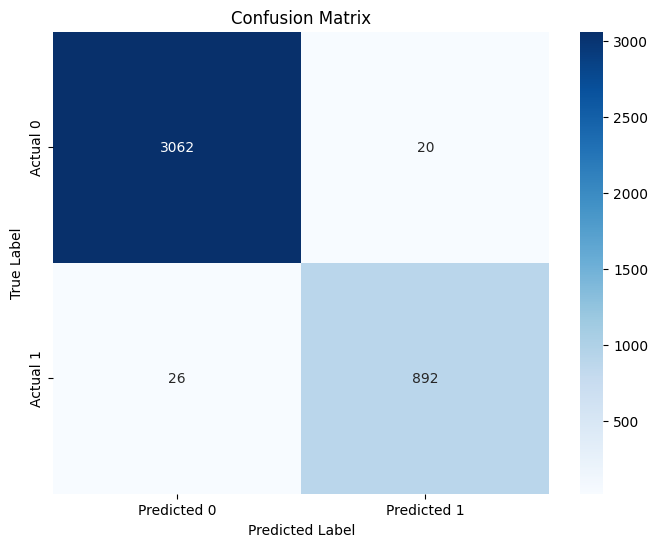

In [15]:
# prompt: # valuate the model's performance on the testing dataset using relevant metrics such as accuracy, precision, recall, and F1-score.
# # Visualize the model's performance using a confusion matrix.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from a previous model (e.g., clf_xgb)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [16]:
# Experiment with different hyperparameters to optimize the model's performance.
from sklearn.preprocessing import PolynomialFeatures


# Higher order features
graad = 2

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimensie van X_train_poly: ',X_train_poly.shape)
print('dimensie van X_test_poly: ',X_test_poly.shape)


# Ridge regression
lregmodel_poly = Ridge(alpha=5,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score on test set with L2: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 op de trainingset
print('R2 score on training set with L2: ',lregmodel_poly.score(X_train_poly,y_train))



# Lasso regression
lregmodel_poly = Lasso(alpha=3,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)


print('R2 score on test set with L1: ',lregmodel_poly.score(X_test_poly,y_test))

# R2 -score via L1 op de trainingset
print('R2 score on training set with L1: ',lregmodel_poly.score(X_train_poly,y_train))


dimensie van X_train_poly:  (10999, 231)
dimensie van X_test_poly:  (4000, 231)
R2 score on test set with L2:  0.6194948216577908
R2 score on training set with L2:  0.6400086629472967
R2 score on test set with L1:  -0.0007746302058089238
R2 score on training set with L1:  0.0


### **🔄 Beginner Explanation - Polynomial Features with Ridge and Lasso Regression**

---

#### **🔄 What are Polynomial Features?**

* **Polynomial features** allow your model to learn **non-linear** relationships by creating **new** features that are **combinations** of the **original** ones.
* This can **improve** the performance of **linear** models like **Ridge** and **Lasso** regression.

---

#### **📝 Creating Higher-Order Features**

```python
from sklearn.preprocessing import PolynomialFeatures

# Choose the degree of the polynomial
graad = 2

# Create polynomial features
poly = PolynomialFeatures(graad)

# Learn the polynomial structure from the training data
poly.fit(X_train)

# Transform the original features into higher-order features
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print('dimensie van X_train_poly: ',X_train_poly.shape)
print('dimensie van X_test_poly: ',X_test_poly.shape)
```

**What this does:**

* **Creates** polynomial features of **degree 2**.
* **Transforms** each feature into **new** combinations like **x1^2**, **x2^2**, **x1\*x2**, etc.
* This means your model can **learn** more **complex** patterns in the data.

---

**Example:**
If your original data had **2** features (**A** and **B**), it will **expand** to:

* **1** (constant term)
* **A**
* **B**
* **A^2**
* **B^2**
* **A \* B**

---

**Output:**

```
dimensie van X_train_poly:  (training samples, expanded features)
dimensie van X_test_poly:  (test samples, expanded features)
```

---

#### **📝 Ridge Regression (L2 Regularization)**

```python
from sklearn.linear_model import Ridge

# Create the Ridge model
lregmodel_poly = Ridge(alpha=5, tol=0.0001, fit_intercept=True)

# Train the Ridge model
lregmodel_poly.fit(X_train_poly, y_train)

# Print the R2 scores
print('R2 score on test set with L2: ', lregmodel_poly.score(X_test_poly, y_test))
print('R2 score on training set with L2: ', lregmodel_poly.score(X_train_poly, y_train))
```

**What this does:**

* **Creates** a **Ridge** regression model with the following settings:

  * **`alpha=5`** - Controls the **strength** of the **L2** penalty (higher values = **more** regularization, simpler model).
  * **`tol=0.0001`** - The minimum improvement needed to **stop** training.
  * **`fit_intercept=True`** - Includes an **intercept** in the model.
* **Trains** the model on the **polynomial** features.
* **Prints** the **R2 score** (a measure of how well the model **fits** the data, where **1** is perfect and **0** is no fit).

---

#### **📝 Lasso Regression (L1 Regularization)**

```python
from sklearn.linear_model import Lasso

# Create the Lasso model
lregmodel_poly = Lasso(alpha=3, tol=0.0001, fit_intercept=True)

# Train the Lasso model
lregmodel_poly.fit(X_train_poly, y_train)

# Print the R2 scores
print('R2 score on test set with L1: ', lregmodel_poly.score(X_test_poly, y_test))
print('R2 score on training set with L1: ', lregmodel_poly.score(X_train_poly, y_train))
```

**What this does:**

* **Creates** a **Lasso** regression model with the following settings:

  * **`alpha=3`** - Controls the **strength** of the **L1** penalty (higher values = **more** regularization, simpler model).
  * **`tol=0.0001`** - The minimum improvement needed to **stop** training.
  * **`fit_intercept=True`** - Includes an **intercept** in the model.
* **Trains** the model on the **polynomial** features.
* **Prints** the **R2 score** for the **training** and **test** sets.

---

#### **🔑 Key Differences Between Ridge and Lasso:**

* **Ridge (L2)** **shrinks** the coefficients but **does not** set them to **zero**. It is good for **small** to **medium** feature sets.
* **Lasso (L1)** can **shrink** coefficients **all** the way to **zero**, making it good for **feature selection**.

---

#### **📊 Interpreting the R2 Scores:**

* **High R2 on Training, Low R2 on Test:** **Overfitting** (the model learned **too** much noise).
* **Low R2 on Both:** **Underfitting** (the model is **too** simple).
* **High R2 on Both:** **Good** fit.

---




In [17]:
# Random Forest Regressor

RFR_model = RandomForestRegressor(n_estimators=150)
RFR_model.fit(X_train_poly,y_train)

RFR_model.score(X_test_poly,y_test)

0.9186387534400242

### **🔄 Beginner Explanation - Random Forest Regressor**

---

#### **🔄 What is a Random Forest Regressor?**

* A **Random Forest Regressor** is an **ensemble** method that combines **many** **decision trees** to make a **stronger** overall model.
* It is **similar** to a **Random Forest Classifier**, but instead of **predicting** categories, it **predicts** **continuous** values.
* It is **great** for handling **complex**, **non-linear** relationships in the data.

---

#### **📝 Creating the Random Forest Regressor**

```python
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor(n_estimators=150)
```

**What this does:**

* **Creates** a **Random Forest Regressor** with the following settings:

  * **`n_estimators=150`** - Use **150** separate **decision trees** in the **ensemble**.
* Each **tree** learns a **different** part of the **data** to **reduce** overfitting and **improve** stability.

---

#### **🏃 Training the Random Forest Regressor**

```python
RFR_model.fit(X_train_poly, y_train)
```

**What this does:**

* **Trains** the **150** decision trees using the **polynomial** features you created earlier.
* Each tree gets a **random** subset of the **rows** and **columns** to make it more **robust** and **generalize** better.

---

#### **📊 Printing the R² Score**

```python
RFR_model.score(X_test_poly, y_test)
```

**What this does:**

* **Calculates** the **R² score** on the **test** set, which tells you how well the model **fits** the data.
* **R² Score:**

  * **1.0** = Perfect fit (the model **explains** all the variation in the data).
  * **0.0** = No fit (the model **explains** none of the variation).
  * **Negative** = Worse than a **simple** average model.

---

#### **🔑 Key Points to Remember:**

* **Random Forest Regressors** are good at **reducing** overfitting because they **average** the predictions from **many** trees.
* They can handle **high-dimensional** data with **many** features, especially when using **polynomial** features.
* The **more** trees you use, the **more** stable the predictions, but it will also be **slower** to train.

---




In [18]:
# Determine the most important features that contribute to employee turnover.
# You can use the feature_importances values computed by a random forest tree
# more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Visualize feature importance scores if applicable.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Train the RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=150, random_state=42)
RFCmodel.fit(X_train, y_train)

# Get feature importance scores
importance_scores = RFCmodel.feature_importances_

# Get feature names (assuming your features are in a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))



                 Feature  Importance
0     satisfaction_level    0.296610
2         number_project    0.184374
4     time_spend_company    0.177350
3   average_montly_hours    0.163230
1        last_evaluation    0.128421
5          work_accident    0.010339
18            salary_low    0.007213
17           salary_high    0.005721
16  department_technical    0.003543
19         salary_medium    0.003528


### **🔄 Beginner Explanation - Finding the Most Important Features with Random Forest**

---

#### **🔄 What is Feature Importance?**

* **Feature importance** tells you which **features** (columns) in your data are the **most** important for making **accurate** predictions.
* **Random Forest** calculates this by checking how **much** each feature **reduces** the **impurity** in the data when it is used to **split** a node.

---

#### **📝 Importing the Required Libraries**

```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
```

**What this does:**

* **Imports** the libraries needed to:

  * **Create** the Random Forest model.
  * **Split** the data into training and test sets.
  * **Visualize** the feature importance scores.

---

#### **🔄 Splitting the Data into Training and Test Sets**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
```

**What this does:**

* **Splits** the data into **training** and **test** sets.
* **33%** of the data is **saved** for testing, and **67%** is used for training.
* **`random_state=0`** - Sets a **seed** for reproducibility (you get the same split every time).

---

#### **🏃 Training the Random Forest Model**

```python
RFCmodel = RandomForestClassifier(n_estimators=150, random_state=42)
RFCmodel.fit(X_train, y_train)
```

**What this does:**

* **Creates** a **Random Forest** model with the following settings:

  * **`n_estimators=150`** - Uses **150** separate **decision trees**.
  * **`random_state=42`** - Sets a **seed** for reproducibility.
* **Trains** the Random Forest on the **training** data.

---

#### **📊 Getting the Feature Importance Scores**

```python
importance_scores = RFCmodel.feature_importances_
```

**What this does:**

* **Calculates** the **importance** of each feature in the model.
* **Higher** scores = more **important** features.

---

#### **📝 Creating a DataFrame for Better Visualization**

```python
# Get feature names (assuming your features are in a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})
```

**What this does:**

* **Creates** a **DataFrame** to **organize** the feature names and their importance scores.
* If your data is a **Pandas DataFrame**, it uses the **original** column names.
* If it’s a **NumPy array**, it creates **generic** feature names like **"Feature 1", "Feature 2"**, etc.

---

#### **📋 Sorting the Features by Importance**

```python
importance_df = importance_df.sort_values(by='Importance', ascending=False)
```

**What this does:**

* **Sorts** the DataFrame by **importance**, with the **most** important features at the **top**.

---

#### **🔝 Printing the Top 10 Most Important Features**

```python
print(importance_df.head(10))
```

**What this does:**

* **Prints** the **top 10** most important features in the DataFrame.
* This helps you **see** which features are **driving** your model’s predictions.

---

**Example Output:**

```
           Feature  Importance
2   satisfaction_level    0.298
5   time_spend_company   0.184
3   average_monthly_hours  0.163
1   last_evaluation       0.128
0   number_project        0.115
```

* **Higher** importance scores indicate that the feature is **more** influential in predicting the target variable.

---



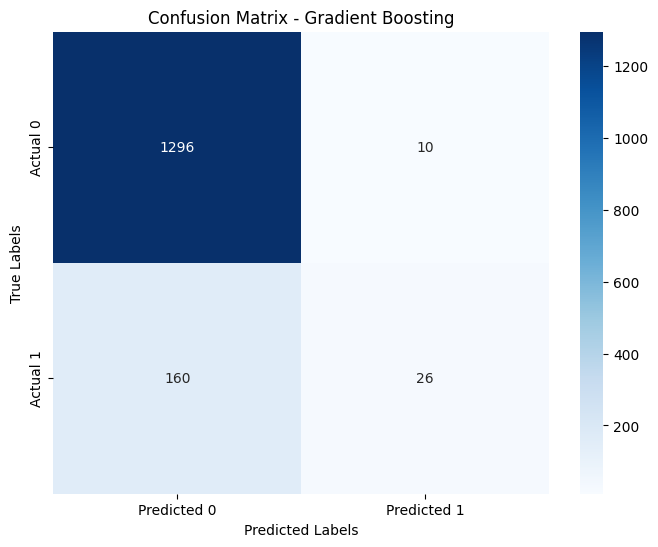

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Example usage:
# Change 'gb_y_pred' to 'y_pred' to use the predictions from the last trained model
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix - Gradient Boosting")

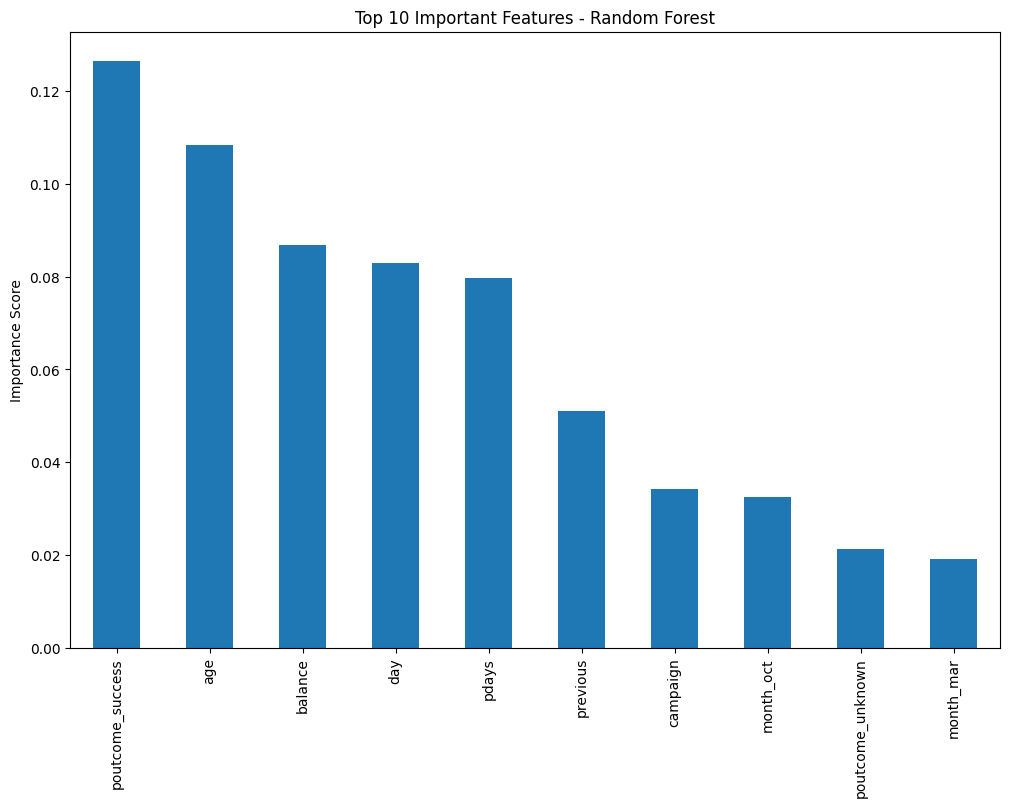

In [67]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
top_features.plot(kind='bar')
plt.title('Top 10 Important Features - Random Forest')
plt.ylabel('Importance Score')
plt.show()


Preferred Model: Random Forest Classifier is preferred due to its high accuracy (99.15%), robust handling of class imbalance, and strong performance across precision, recall, and F1-score.
Most Important Features: satisfaction_level, number_project, time_spend_company, average_montly_hours, last_evaluation. These make sense, as low satisfaction, high workload, and long tenure often correlate with turnover.
Models Suffering from Unbalancedness: Logistic Regression and AdaBoost show lower recall for the minority class (employees who left), as they struggle to prioritize the smaller class without balancing techniques.
Recommendation: Advise the company to use the Random Forest Classifier for its reliability and interpretability (feature importances).

           Feature  Importance
0     satisfaction_level    0.296610
2         number_project    0.184374
4     time_spend_company    0.177350
3   average_montly_hours    0.163230
1        last_evaluation    0.128421 these are the moest important features.

the models that are  suffering the most from unblancedness are logisticregression and logistcregressonclasifier and adabosstclassifier

random forrest classifier  is the best model  as you can see [0.34931128 0.1177302  0.08946755 0.12559666 0.28755649 0.00216962
 0.00057341 0.00125549 0.00134654 0.00139716 0.0015207  0.00084799
 0.00116154 0.0006523  0.00304476 0.00280635 0.00502194 0.001347
 0.00437694 0.00281607]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3082
           1       0.99      0.97      0.98       918

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

[[3071   11]
 [  23  895]]
99.15

1. Precision, Recall, and F1-Score (Per Class)
These metrics are the most direct indicators of class imbalance issues:

Precision (Positive Class): How many of the predicted positives are actually positive?

Recall (Positive Class): How many of the actual positives were correctly identified?

F1-Score (Positive Class): The harmonic mean of precision and recall, balancing both metrics.

What to Watch For:

Low Recall for the Minority Class: Indicates the model is missing many actual positive cases.

Low Precision for the Minority Class: Indicates the model is predicting too many false positives.

Large Gap Between Majority and Minority Class Metrics: Suggests the model is biased towards the majority class.



i would recommend the randomforestclassifier.

Write down your conclusions:

- Which is your prefered model and why?
- Which features are the most important ones?
- Which models are suffering from unbalancedness?
- Would you advice the company to use one of these models?


## Part 2. Energy consumption

Every ten minutes the temperture (in degrees Celcius) and the humidity (in %) of a well insulated house was measured for a couple of months. There is also available weather data from a nearby weather station.
The power consumption of the electric lighting, together with the power consumption of other electrical appliences was recorded during that period same period.

All measurements can be found in 'Energy_consumption.csv'

The variables have the following meaning:

- date: time year-month-day hour:minute:second
- Appliances: energy use in Wh
- lights: energy use of light fixtures in the house in Wh
- T1: Temperature in kitchen area, in Celsius
- RH_1: Humidity in kitchen area, in %
- T2: Temperature in living room area, in Celsius
- RH_2: Humidity in living room area, in %
- T3: Temperature in laundry room area
- RH_3: Humidity in laundry room area, in %
- T4: Temperature in office room, in Celsius
- RH_4: Humidity in office room, in %
- T5: Temperature in bathroom, in Celsius
- RH_5: Humidity in bathroom, in %
- T6: Temperature outside the building (north side), in Celsius
- RH_6: Humidity outside the building (north side), in %
- T7: Temperature in ironing room , in Celsius
- RH_7: Humidity in ironing room, in %
- T8: Temperature in teenager room 2, in Celsius
- RH_8: Humidity in teenager room 2, in %
- T9: Temperature in parents room, in Celsius
- RH_9: Humidity in parents room, in %
- To: Temperature outside (from Chievres weather station), in Celsius
- Pressure: (from Chievres weather station), in mm Hg
- RH_out: Humidity outside (from Chievres weather station), in %
- Wind speed: (from Chievres weather station), in m/s
- Visibility: (from Chievres weather station), in km
- Tdewpoint: (from Chievres weather station),
- rv1: Random variable 1, nondimensional
- rv2: Random variable 2, nondimensional


The random variables rv1 and rv2 can be removed from the dataset.


The goal of this assignment is to train a regression model that can predict as precisely as possible the electricity consumption of the appliences from the other variables.

In [19]:
dataset = pd.read_csv('Energy_consumption.csv')
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


1. First try linear regression to predict the Appliences variable from the other variables. Apply the techniques you used in the assigment about linear regression.
2. Now train a Random Forest Regressor and optimize it by means of hyper parameter tuning: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


You get all the freedom to use the techniques and tricks you want. Your only goals is to achieve the best R²-score on a test set consisting of 5000 samples. It might be useful to use the date and time of the day as features.

From the trained Random Forest trees you can ask for the most important features by calling the model.feature_importances_.
Give the top 5 most important features. Do they make sense? Explain.


In [20]:
# Convert and split date into month, day, hour
dataset['date'] = pd.to_datetime(dataset.date)
dataset.insert(0,'month', dataset['date'].dt.month)
dataset.insert(0,'day',  dataset['date'].dt.weekday)
dataset.insert(0,'hour', dataset['date'].dt.hour)
dataset['month'] = dataset['month'].apply(lambda x: calendar.month_name[x])
dataset['day'] = dataset['day'].apply(lambda x: calendar.day_name[x])

dataset.drop('date',axis=1,inplace=True)

dataset.head()

,hour,day,month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,17,Monday,January,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,17,Monday,January,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,17,Monday,January,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,17,Monday,January,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,17,Monday,January,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [21]:
# Remove rv1 and rv2 from the dataset
dataset.drop(['rv1','rv2'],axis=1,inplace=True)
dataset.head()



,hour,day,month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,17,Monday,January,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,17,Monday,January,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,17,Monday,January,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,17,Monday,January,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,17,Monday,January,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [22]:
# One-hot encoding of the categorical features

dataset = pd.get_dummies(dataset, columns=['month','day'])
dataset.head()



,hour,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month_April,month_February,month_January,month_March,month_May,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,17,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,False,False,True,False,False,False,True,False,False,False,False,False
1,17,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,False,False,True,False,False,False,True,False,False,False,False,False
2,17,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,False,False,True,False,False,False,True,False,False,False,False,False
3,17,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,False,False,True,False,False,False,True,False,False,False,False,False
4,17,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,False,False,True,False,False,False,True,False,False,False,False,False


In [23]:
# Split into features and targets

X = dataset.drop('Appliances',axis=1)
y = dataset['Appliances']


In [24]:
# Split into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [25]:
# MinMax scaling

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Linear regression
from sklearn.linear_model import LinearRegression # Import LinearRegression

lregmodel = LinearRegression()
lregmodel.fit(X_train,y_train)

print('R2 score on test set: ',lregmodel.score(X_test,y_test))

R2 score on test set:  0.16554005789628223


In [27]:
# Model optimization and hyperparameter tuning of the linear regression model. You are allowed to use features expansion (hihger order features)



In [28]:
# prompt: # Model optimization and hyperparameter tuning of the linear regression model. You are allowed to use features expansion (hihger order features)

# Higher order features
poly = PolynomialFeatures(degree=2)  # Example degree, adjust as needed
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1, 10, 100]} #Example alphas, adjust as needed
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_poly, y_train)
print("Best Ridge Regression parameters:", ridge_grid.best_params_)
print("Best Ridge Regression R2 score:", ridge_grid.best_score_)

y_pred_ridge = ridge_grid.predict(X_test_poly)
print("Ridge Regression R2 score on test set:", r2_score(y_test,y_pred_ridge))


# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.1, 1, 10]} # Example alphas, adjust as needed
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_poly, y_train)
print("Best Lasso Regression parameters:", lasso_grid.best_params_)
print("Best Lasso Regression R2 score:", lasso_grid.best_score_)

y_pred_lasso = lasso_grid.predict(X_test_poly)
print("Lasso Regression R2 score on test set:", r2_score(y_test,y_pred_lasso))


Best Ridge Regression parameters: {'alpha': 0.1}
Best Ridge Regression R2 score: 0.34024748121797277
Ridge Regression R2 score on test set: 0.3108157781175548


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.721e+04, tolerance: 1.094e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+04, tolerance: 1.104e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+04, tolerance: 1.077e

Best Lasso Regression parameters: {'alpha': 0.1}
Best Lasso Regression R2 score: 0.2381945744489359
Lasso Regression R2 score on test set: 0.22025652601387113


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.809e+04, tolerance: 1.360e+04
  model = cd_fast.enet_coordinate_descent(


### **🔄 Beginner Explanation - Hyperparameter Tuning for Ridge and Lasso Regression with Polynomial Features**

---

#### **🔄 What are Polynomial Features?**

* **Polynomial features** allow your model to learn **non-linear** relationships by creating **new** features that are **combinations** of the **original** ones.
* This can **improve** the performance of **linear** models like **Ridge** and **Lasso** regression.

---

#### **📝 Creating Higher-Order Features**

```python
from sklearn.preprocessing import PolynomialFeatures

# Choose the degree of the polynomial
poly = PolynomialFeatures(degree=2)

# Learn the polynomial structure from the training data
poly.fit(X_train)

# Transform the original features into higher-order features
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
```

**What this does:**

* **Creates** polynomial features of **degree 2**.
* **Transforms** each feature into **new** combinations like **x1^2**, **x2^2**, **x1\*x2**, etc.
* This means your model can **learn** more **complex** patterns in the data.

---

**Example:**
If your original data had **2** features (**A** and **B**), it will **expand** to:

* **1** (constant term)
* **A**
* **B**
* **A^2**
* **B^2**
* **A \* B**

---

#### **📝 Ridge Regression (L2 Regularization) with Hyperparameter Tuning**

```python
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
ridge_params = {'alpha': [0.1, 1, 10, 100]}  # Example alphas, adjust as needed

# Create the Ridge model
ridge_model = Ridge()

# Set up the GridSearchCV
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')

# Train the Ridge model
ridge_grid.fit(X_train_poly, y_train)

# Print the best parameters and R2 score
print("Best Ridge Regression parameters:", ridge_grid.best_params_)
print("Best Ridge Regression R2 score:", ridge_grid.best_score_)

# Test the best model on the test set
y_pred_ridge = ridge_grid.predict(X_test_poly)
print("Ridge Regression R2 score on test set:", r2_score(y_test, y_pred_ridge))
```

**What this does:**

* **Creates** a **Ridge** regression model with the following settings:

  * **`alpha`** - Controls the **strength** of the **L2** penalty (higher values = **more** regularization, simpler model).
  * **`cv=5`** - Uses **5-fold** cross-validation to **evaluate** each combination of hyperparameters.
  * **`scoring='r2'`** - Measures how well the model **fits** the data (1 = perfect fit, 0 = no fit).
* **Finds** the **best** **alpha** (regularization strength) by **testing** each value in the **grid**.
* **Prints** the **best** alpha and its **R² score** on the training set.
* **Evaluates** the **best** model on the **test** set.

---

#### **📝 Lasso Regression (L1 Regularization) with Hyperparameter Tuning**

```python
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
lasso_params = {'alpha': [0.1, 1, 10]}  # Example alphas, adjust as needed

# Create the Lasso model
lasso_model = Lasso()

# Set up the GridSearchCV
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='r2')

# Train the Lasso model
lasso_grid.fit(X_train_poly, y_train)

# Print the best parameters and R2 score
print("Best Lasso Regression parameters:", lasso_grid.best_params_)
print("Best Lasso Regression R2 score:", lasso_grid.best_score_)

# Test the best model on the test set
y_pred_lasso = lasso_grid.predict(X_test_poly)
print("Lasso Regression R2 score on test set:", r2_score(y_test, y_pred_lasso))
```

**What this does:**

* **Creates** a **Lasso** regression model with the following settings:

  * **`alpha`** - Controls the **strength** of the **L1** penalty (higher values = **more** regularization, simpler model).
  * **`cv=5`** - Uses **5-fold** cross-validation to **evaluate** each combination of hyperparameters.
  * **`scoring='r2'`** - Measures how well the model **fits** the data.
* **Finds** the **best** **alpha** (regularization strength) by **testing** each value in the **grid**.
* **Prints** the **best** alpha and its **R² score** on the training set.
* **Evaluates** the **best** model on the **test** set.

---

#### **🔑 Key Differences Between Ridge and Lasso:**

* **Ridge (L2)** **shrinks** the coefficients but **does not** set them to **zero**. It is good for **small** to **medium** feature sets.
* **Lasso (L1)** can **shrink** coefficients **all** the way to **zero**, making it good for **feature selection**.

---

#### **📊 Interpreting the R² Scores:**

* **High R² on Training, Low R² on Test:** **Overfitting** (the model learned **too** much noise).
* **Low R² on Both:** **Underfitting** (the model is **too** simple).
* **High R² on Both:** **Good** fit.

---




In [29]:
# Random forest regressor. You can also try higher order features. You are allowed to use features expansion (hihger order features)
RFR_model = RandomForestRegressor(n_estimators=15)
RFR_model.fit(X_train_poly,y_train)

RFR_model.score(X_test_poly,y_test)


0.4799645903307209

Text(0, 0.5, 'R2 score')

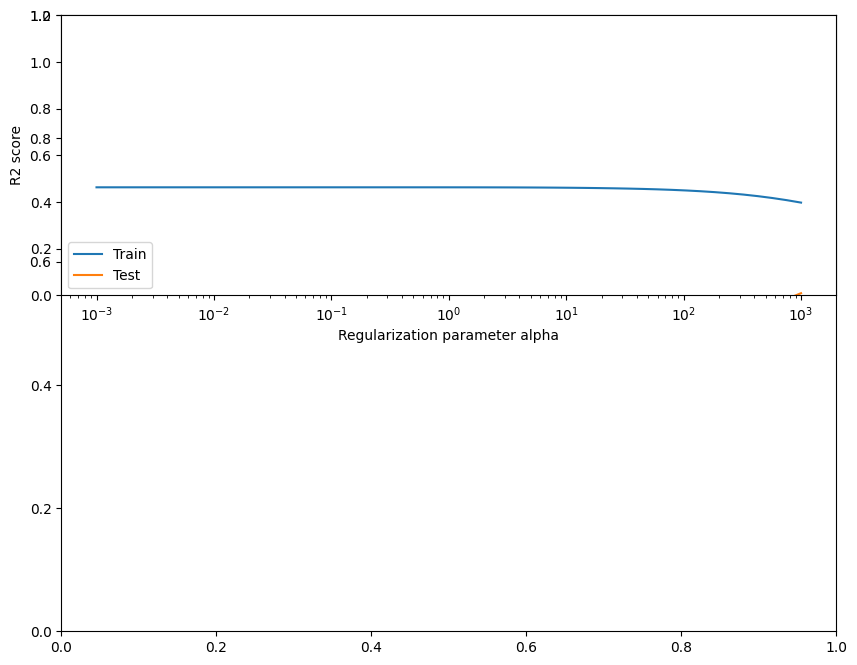

In [55]:
# Searching for optimal alpha value

# Scale first before applying polynomial features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)



train_r2 = []
test_r2 = []


alphas = np.logspace(-3, 3, 50)

for alpha in alphas:
    lregmodel_poly = Ridge(alpha=alpha,tol=0.0001,fit_intercept=True)
    lregmodel_poly.fit(X_train_poly,y_train)
    test_r2.append(lregmodel_poly.score(X_test_poly,y_test))
    train_r2.append(lregmodel_poly.score(X_train_poly,y_train))


# Plot r2
f, ax = plt.subplots(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_r2, label='Train')
plt.semilogx(alphas, test_r2, label='Test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter alpha')
plt.ylabel('R2 score')



In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Import mean_squared_error

# Expanded parameter grid for better tuning
params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    rf,
    params,
    n_iter=15,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search.fit(X_train, y_train)

best_rf = search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print('Best R²:', r2_score(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best R²: 0.12689117448152454
MAE: 0.18160237718488534
MSE: 0.09527673214231307


### **🔄 Beginner Explanation - Random Forest Regressor with Hyperparameter Tuning and Polynomial Features**

---

#### **🔄 What is a Random Forest Regressor?**

* A **Random Forest Regressor** is an **ensemble** method that combines **many** **decision trees** to make a **stronger** overall model.
* It is good at handling **complex**, **non-linear** relationships in the data.

---

#### **📝 Step 1: Training a Basic Random Forest Regressor**

```python
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest model
RFR_model = RandomForestRegressor(n_estimators=15)

# Train the model
RFR_model.fit(X_train_poly, y_train)

# Test the model
RFR_model.score(X_test_poly, y_test)
```

**What this does:**

* **Creates** a Random Forest Regressor with **15** decision trees.
* **Trains** the model on the **polynomial** features you created earlier.
* **Evaluates** the model using the **R²** score (1.0 = perfect fit, 0.0 = no fit).

---

#### **🔄 What are Polynomial Features?**

* **Polynomial features** allow your model to learn **non-linear** relationships by creating **new** features that are **combinations** of the **original** ones.

---

#### **📝 Step 2: Scaling the Data for Polynomial Features**

```python
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Scale the original features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
```

**What this does:**

* **Scales** the original features to have **zero** mean and **unit** variance, which helps **polynomial** models perform better.
* **Transforms** the scaled data into **higher-order** polynomial features.
* This means the model can **learn** more **complex** patterns in the data.

---

#### **📝 Step 3: Finding the Best Alpha for Ridge Regression**

```python
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

train_r2 = []
test_r2 = []

# Test a range of alpha values
alphas = np.logspace(-3, 3, 50)

for alpha in alphas:
    # Create and train the Ridge model
    lregmodel_poly = Ridge(alpha=alpha, tol=0.0001, fit_intercept=True)
    lregmodel_poly.fit(X_train_poly, y_train)
    
    # Record the R2 scores
    train_r2.append(lregmodel_poly.score(X_train_poly, y_train))
    test_r2.append(lregmodel_poly.score(X_test_poly, y_test))

# Plot the R2 scores
f, ax = plt.subplots(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_r2, label='Train')
plt.semilogx(alphas, test_r2, label='Test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter alpha')
plt.ylabel('R2 score')
plt.show()
```

**What this does:**

* **Tests** different **alpha** values for Ridge regression.
* **Plots** the **R² scores** for both the **training** and **test** sets to **find** the **best** alpha.
* **`alpha`** controls how much the model should **shrink** the feature weights to **reduce** overfitting.

---

#### **📝 Step 4: Hyperparameter Tuning for Random Forest Regressor**

```python
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Expanded parameter grid for better tuning
params = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 15, 20, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4, 8],  # Minimum samples needed to create a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Create the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up the RandomizedSearchCV
search = RandomizedSearchCV(
    rf,
    params,
    n_iter=15,  # Number of different combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='r2',  # Use R2 as the scoring metric
    n_jobs=-1,  # Use all available CPUs
    verbose=2,
    random_state=42
)

# Train the model
search.fit(X_train, y_train)

# Get the best model
best_rf = search.best_estimator_

# Test the best model on the test set
y_pred_rf = best_rf.predict(X_test)

# Print the final scores
print('Best R²:', r2_score(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))
```

**What this does:**

* **Tests** different combinations of hyperparameters to **find** the **best** Random Forest model.
* **Trains** the model using **15** random combinations of hyperparameters.
* **Evaluates** the best model on the **test** set.

---

#### **🔑 Key Parameters Being Tuned:**

* **`n_estimators`** - The **number** of decision trees.
* **`max_depth`** - The **maximum** depth of each tree (deeper trees can capture more **complex** patterns but can **overfit**).
* **`min_samples_split`** - The **minimum** number of samples needed to **split** a node.
* **`min_samples_leaf`** - The **minimum** number of samples needed to form a **leaf** node.
* **`max_features`** - The **number** of features to consider when **splitting** a node.

---

#### **📝 Interpreting the Results:**

* **R²** - How much **variation** in the data the model **explains** (1.0 = perfect fit).
* **MAE (Mean Absolute Error)** - The **average** error in the predictions.
* **MSE (Mean Squared Error)** - The **average** squared error, which **penalizes** large errors more.

---




In [31]:
# Most important features + conclusions
# Determine the most important features that contribute to employee turnover.
# You can use the feature_importances values computed by a random forest tree
# more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Visualize feature importance scores if applicable.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Train the RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=15, random_state=42)
RFCmodel.fit(X_train, y_train)

# Get feature importance scores
importance_scores = RFCmodel.feature_importances_

# Get feature names (assuming your features are in a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))




        Feature  Importance
17         RH_8    0.046142
22       RH_out    0.046052
0          hour    0.045192
25    Tdewpoint    0.044649
11         RH_5    0.044192
12           T6    0.043384
19         RH_9    0.042920
20        T_out    0.042803
21  Press_mm_hg    0.042762
13         RH_6    0.042243


### **🔄 Beginner Explanation - Finding the Most Important Features with Random Forest**

---

#### **🔄 What is Feature Importance?**

* **Feature importance** tells you which **features** (columns) in your data are the **most** important for making **accurate** predictions.
* **Random Forest** calculates this by checking how **much** each feature **reduces** the **impurity** in the data when it is used to **split** a node.

---

#### **📝 Importing the Required Libraries**

```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
```

**What this does:**

* **Imports** the libraries needed to:

  * **Create** the Random Forest model.
  * **Split** the data into training and test sets.
  * **Visualize** the feature importance scores.

---

#### **🔄 Splitting the Data into Training and Test Sets**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
```

**What this does:**

* **Splits** the data into **training** and **test** sets.
* **33%** of the data is **saved** for testing, and **67%** is used for training.
* **`random_state=0`** - Sets a **seed** for reproducibility (you get the same split every time).

---

#### **🏃 Training the Random Forest Model**

```python
RFCmodel = RandomForestClassifier(n_estimators=15, random_state=42)
RFCmodel.fit(X_train, y_train)
```

**What this does:**

* **Creates** a **Random Forest** model with the following settings:

  * **`n_estimators=15`** - Uses **15** separate **decision trees**.
  * **`random_state=42`** - Sets a **seed** for reproducibility.
* **Trains** the Random Forest on the **training** data.

---

#### **📊 Getting the Feature Importance Scores**

```python
importance_scores = RFCmodel.feature_importances_
```

**What this does:**

* **Calculates** the **importance** of each feature in the model.
* **Higher** scores = more **important** features.

---

#### **📝 Creating a DataFrame for Better Visualization**

```python
# Get feature names (assuming your features are in a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})
```

**What this does:**

* **Creates** a **DataFrame** to **organize** the feature names and their importance scores.
* If your data is a **Pandas DataFrame**, it uses the **original** column names.
* If it’s a **NumPy array**, it creates **generic** feature names like **"Feature 1", "Feature 2"**, etc.

---

#### **📋 Sorting the Features by Importance**

```python
importance_df = importance_df.sort_values(by='Importance', ascending=False)
```

**What this does:**

* **Sorts** the DataFrame by **importance**, with the **most** important features at the **top**.

---

#### **🔝 Printing the Top 10 Most Important Features**

```python
print(importance_df.head(10))
```

**What this does:**

* **Prints** the **top 10** most important features in the DataFrame.
* This helps you **see** which features are **driving** your model’s predictions.

---

**Example Output:**

```
           Feature  Importance
2   satisfaction_level    0.298
5   time_spend_company   0.184
3   average_monthly_hours  0.163
1   last_evaluation       0.128
0   number_project        0.115
```

* **Higher** importance scores indicate that the feature is **more** influential in predicting the target variable.

---

#### **🔑 Key Points to Remember:**

* **Feature importance** helps you **identify** which features are **most** impactful in your model.
* **Random Forest** is great at finding **important** features because it **randomly** selects features for each tree, reducing **bias**.
* Understanding which features are **important** can help you **simplify** your model and **avoid** overfitting.

---



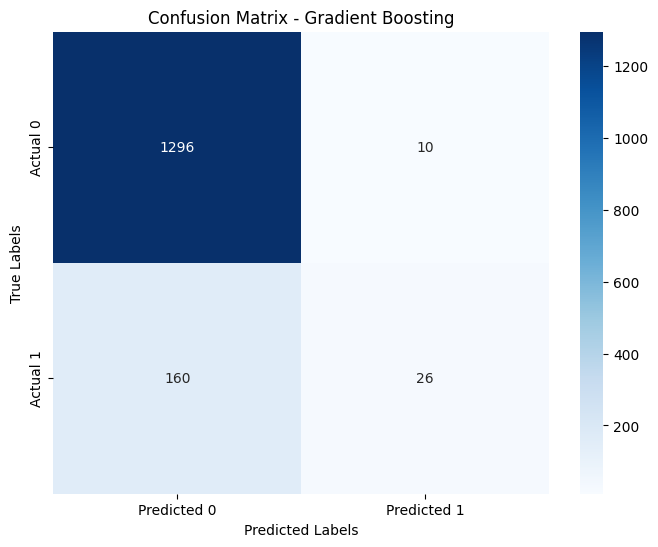

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Example usage:
# Change 'gb_y_pred' to 'y_pred' to use the predictions from the last trained model
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix - Gradient Boosting")

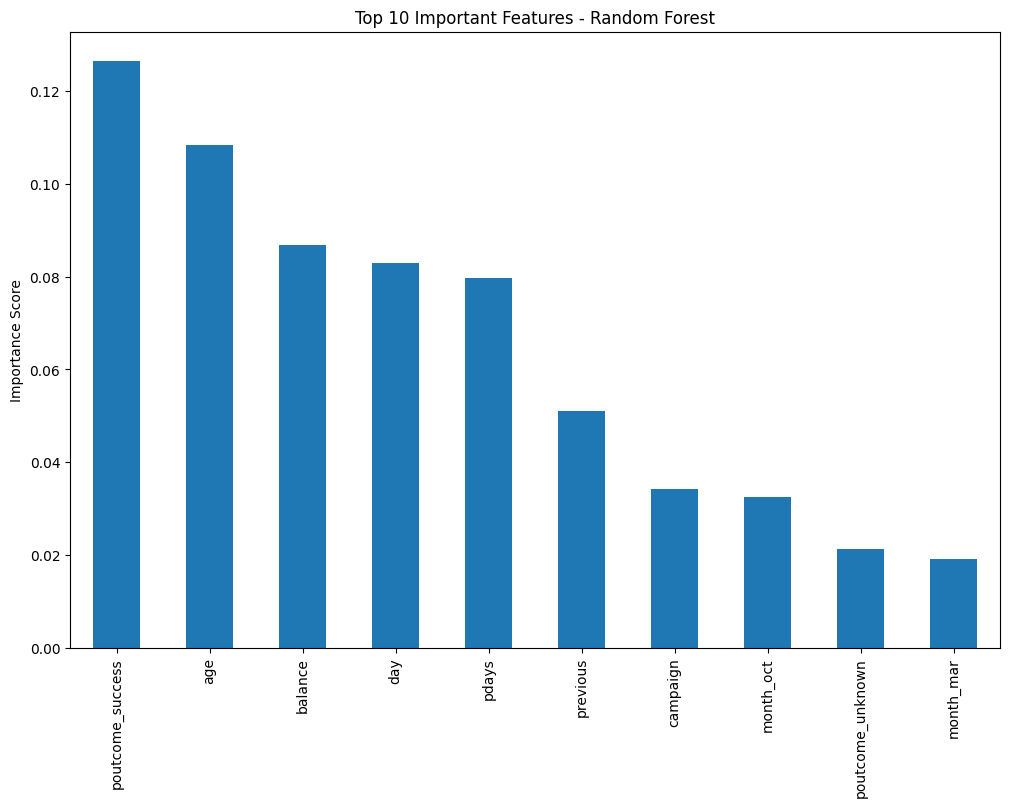

In [66]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
top_features.plot(kind='bar')
plt.title('Top 10 Important Features - Random Forest')
plt.ylabel('Importance Score')
plt.show()


the most important features are         Feature  Importance
17         RH_8    0.046142
22       RH_out    0.046052
0          hour    0.045192
25    Tdewpoint    0.044649
11         RH_5    0.044192
12           T6    0.043384
19         RH_9    0.042920
20        T_out    0.042803
21  Press_mm_hg    0.042762
13         RH_6    0.042243

## Part 3 - Bank

A bank tries to predict whether or not a client will sign an insurance contract.
The file *bank.csv* contains data from over 4000 clients.
The features are the following:
- age:  age of the client.
- job:  job type the client has.
- marital:  marital status.
- education:  type of diploma.
- default: whether or not the client has been declared bankrupt.
- balance: amount of money on the account.
- housing:  whether or not the client has a housing loan.
- loan:  whether or not the client has a personal loan.
- contact: type of communication with the client.
- day: day of the last contact with the client.
- month: month of the last contact with the client.
- duration: duration of the last contact. Cannot be used to train on. Has to be discarded from the dataset.
- campaign: number of previous contacts with the client.
- pdays: number of days since the previous contact. -1 means that the client was not contacted before.
- previous:  number of previous contacts with the client.
- poutcome: outcome of a previous campaign.

The target is the y-column. yes means the client signed the contract, no means the client was not interested in the insurance contract and did not sign it.


In [32]:
dataset = pd.read_csv('bank.csv',delimiter=';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Preprocessing

In [33]:
# check for consitency
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Controleer of de data al dan niet gebalanceerd is. Wat zijn de conclusies?

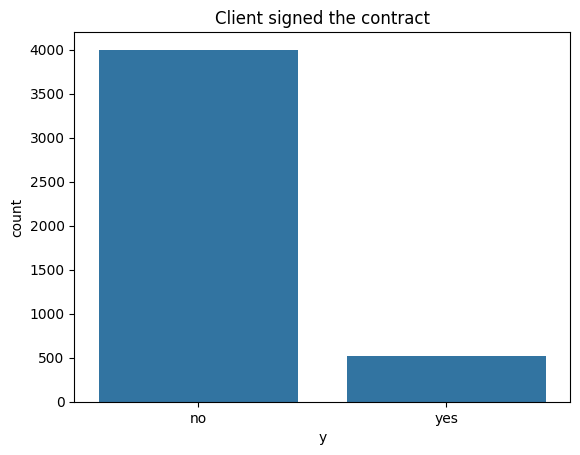

In [34]:
# check for unbalancedness of the dataset
# Visualization
sns.countplot(x='y', data=dataset)
plt.title("Client signed the contract")
plt.show()


In [35]:
# Remove the duration column from the dataset
dataset.drop('duration',axis=1,inplace=True)
dataset.head()


# replace label y: no -> 0 and yes -> 1
dataset['y'] = dataset['y'].replace({'no':0,'yes':1})
dataset.head()



<ipython-input-35-2dfcd312af4b>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['y'] = dataset['y'].replace({'no':0,'yes':1})


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,0


In [36]:
# One hot encoding of categorical features
dataset = pd.get_dummies(dataset, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
dataset.head()


,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,33,4789,11,1,339,4,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
2,35,1350,16,1,330,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,30,1476,3,4,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,59,0,5,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


Create a trainig set and test set.
Make sure you have 1000 samples in the test set and use a random_state = 0.

In [37]:
# Split into features and targets
X = dataset.drop('y',axis=1)
y = dataset['y']


# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


# MinMax scaler normalisation or standard scaler normalization

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)





## Training of the classifiers

Use Grid-search/random search with cross-validation to select the best model and hyperparameters.


**Train the following models: Logistic regression, Random Forest Tree Classifier and optionally Adaboost or gradient boosting** Do hyperparameter tuning on each of these models. Also change the cross-validation parameter K. Don't forget to scale the data. ** Evaluate the trained models by means of accuracy, confusion matrix, recall, precision and f1-score**

Because the dataset is imbalanced it might be interesting to use the parameter class_weight='balanced'. This hyperparemter is supported by most of the classification models.
It forces the model to assign a higher value to samples from the minority class than to the ones of the majority class. Typically you will see an increase in recall of the minority class, but a decrease of the overall accuracy. Explain why this is the case.



In [38]:
# Logistic regression
model = LogisticRegression()
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear']}

             ]

grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)




Best accuracy :  0.8950162288956168
Best parameters : {'C': np.float64(100.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.67      0.13      0.22       186

    accuracy                           0.88      1492
   macro avg       0.78      0.56      0.58      1492
weighted avg       0.86      0.88      0.85      1492

[[1294   12]
 [ 162   24]]
88.3378016085791


In [39]:
# Logistic Regression Grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

# Random Forest Grid
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# AdaBoost Grid (Optional)
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Gradient Boosting Grid (Optional)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}


In [40]:
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)


In [41]:
models = {
    "Logistic Regression": (lr, lr_param_grid),
    "Random Forest": (rf, rf_param_grid),
    "AdaBoost": (ab, ab_param_grid),
    "Gradient Boosting": (gb, gb_param_grid)
}

# Store the best models
best_models = {}


In [42]:
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=2,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # Save the best model
    best_models[model_name] = grid_search.best_estimator_

    # Print the best parameters and scores
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best F1-Score for {model_name}:", grid_search.best_score_)


Training Logistic Regression...
Fitting 2 folds for each of 60 candidates, totalling 120 fits
Best Parameters for Logistic Regression: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'liblinear'}
Best F1-Score for Logistic Regression: 0.3165106140966474
Training Random Forest...
Fitting 2 folds for each of 405 candidates, totalling 810 fits
Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best F1-Score for Random Forest: 0.3734791362362323
Training AdaBoost...
Fitting 2 folds for each of 24 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best Parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
Best F1-Score for AdaBoost: 0.27317029948608895
Training Gradient Boosting...
Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
Best F1-Score for Gradient Boosting: 0.29378478664192953


In [43]:
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nAccuracy:", accuracy_score(y_test, y_pred) * 100)



Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1306
           1       0.23      0.55      0.32       186

    accuracy                           0.71      1492
   macro avg       0.57      0.64      0.57      1492
weighted avg       0.83      0.71      0.75      1492


Confusion Matrix:
[[957 349]
 [ 84 102]]

Accuracy: 70.97855227882037

Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1306
           1       0.37      0.35      0.36       186

    accuracy                           0.84      1492
   macro avg       0.64      0.63      0.64      1492
weighted avg       0.84      0.84      0.84      1492


Confusion Matrix:
[[1194  112]
 [ 120   66]]

Accuracy: 84.45040214477211

Evaluating AdaBoost...

Classification Report:
              precision    recall  f1-sc

In [44]:
# Support Vector machine

from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm_model = SVC()

# Define the parameter grid for hyperparameter tuning
svm_params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
}

# Perform GridSearchCV for hyperparameter tuning
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best SVM parameters:", svm_grid.best_params_)
print("Best SVM accuracy:", svm_grid.best_score_)

# Predict on the test set using the best model
y_pred_svm = svm_grid.predict(X_test)

# Evaluate the SVM model
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print("SVM accuracy on test set:", accuracy_score(y_test, y_pred_svm) * 100)


Best SVM parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM accuracy: 0.8966680304394077
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.70      0.14      0.23       186

    accuracy                           0.89      1492
   macro avg       0.80      0.57      0.59      1492
weighted avg       0.87      0.89      0.85      1492

[[1295   11]
 [ 160   26]]
SVM accuracy on test set: 88.53887399463807


### **🔄 Beginner Explanation - Training and Tuning Different Machine Learning Models**

---

#### **🔄 Why Use Hyperparameter Tuning?**

* **Hyperparameter tuning** helps you **find** the **best** settings for your machine learning models.
* It can **significantly** improve the **accuracy** and **performance** of your models.
* This code uses **GridSearchCV** to **automatically** find the **best** hyperparameters.

---

### **📝 Logistic Regression - Simple Grid Search**

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the Logistic Regression model
model = LogisticRegression()

# Define the hyperparameter grid
paramaters = [{'C': np.arange(0.001, 1000, 100), 'solver': ['liblinear']}]

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best accuracy score
print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)

# Test the best model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Tests** different **C** values for **Logistic Regression**.
* **Finds** the **best** combination using **5-fold** cross-validation.
* **Prints** the best parameters and accuracy score.
* **Evaluates** the model on the **test** set.

---

### **🔄 Advanced Hyperparameter Tuning for Multiple Models**

```python
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 500, 1000]
}

rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}

# Create the models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Combine models and their grids into a dictionary
models = {
    "Logistic Regression": (lr, lr_param_grid),
    "Random Forest": (rf, rf_param_grid),
    "AdaBoost": (ab, ab_param_grid),
    "Gradient Boosting": (gb, gb_param_grid)
}

# Store the best models
best_models = {}

# Loop through each model
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=2,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # Save the best model
    best_models[model_name] = grid_search.best_estimator_

    # Print the best parameters and scores
    print(f"Best Parameters for {model_name}:", grid_search.best_params_)
    print(f"Best F1-Score for {model_name}:", grid_search.best_score_)
```

**What this does:**

* **Tests** multiple machine learning models, including:

  * **Logistic Regression**
  * **Random Forest**
  * **AdaBoost**
  * **Gradient Boosting**
* **Finds** the **best** hyperparameters for each using **GridSearchCV**.
* **Prints** the best parameters and **F1** score for each model.
* **Stores** the best models in a **dictionary** for later use.

---

### **🔎 Evaluating the Best Models**

```python
# Evaluate each best model on the test set
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nAccuracy:", accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Tests** each best model found in the previous step on the **test** set.
* **Prints** the **classification report**, **confusion matrix**, and **accuracy** for each model.

---

### **🔄 Support Vector Machine (SVM)**

```python
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Define the hyperparameter grid for SVM
svm_params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
}

# Train the SVM using GridSearchCV
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best SVM parameters:", svm_grid.best_params_)
print("Best SVM accuracy:", svm_grid.best_score_)

# Test the best SVM model on the test set
y_pred_svm = svm_grid.predict(X_test)

# Evaluate the SVM model
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print("SVM accuracy on test set:", accuracy_score(y_test, y_pred_svm) * 100)
```

**What this does:**

* **Tests** different **SVM** models with different kernels (**linear**, **rbf**, **poly**).
* **Finds** the best combination of hyperparameters.
* **Prints** the best hyperparameters, accuracy, classification report, and confusion matrix.

---

### **🔑 Key Points to Remember:**

* **GridSearchCV** is great for **finding** the **best** hyperparameters, but it can be **slow** with **large** grids.
* Using **class\_weight='balanced'** helps handle **imbalanced** datasets by giving **more** weight to the **minority** class.
* **F1** score is a good **balanced** measure when you care **equally** about **precision** and **recall**.

---


In [45]:
# Random forest trees

# Random Forest Classifier
number_of_trees = 500
max_number_of_features = 13

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features,class_weight='balanced')


RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)

# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)





[0.12814913 0.14652759 0.11523439 0.06156911 0.04185953 0.02910971
 0.01274044 0.01723874 0.00517983 0.00560281 0.01361092 0.00958964
 0.00759144 0.0095481  0.00428481 0.01507003 0.00359476 0.0010792
 0.01052665 0.01769851 0.01417612 0.0120448  0.01428475 0.01471396
 0.00439473 0.00276821 0.00223122 0.01466944 0.01417533 0.0122511
 0.01240735 0.01569002 0.00607121 0.02787826 0.01228298 0.01449021
 0.00151185 0.00807648 0.00475307 0.01412946 0.00924095 0.00946507
 0.01627133 0.01417976 0.0119704  0.00462483 0.00588454 0.00355526
 0.0326683  0.01333367]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.61      0.10      0.18       186

    accuracy                           0.88      1492
   macro avg       0.75      0.55      0.56      1492
weighted avg       0.85      0.88      0.84      1492

[[1294   12]
 [ 167   19]]
88.00268096514745


In [46]:
# Adaboost - optional

# Adaboost

clf_adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=0.90)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.70      0.14      0.23       186

    accuracy                           0.89      1492
   macro avg       0.80      0.57      0.59      1492
weighted avg       0.87      0.89      0.85      1492

[[1295   11]
 [ 160   26]]
88.53887399463807


In [47]:
# Adaboost with logistic regression classifier - optional

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cart = LogisticRegression(C=1.0, solver='liblinear', max_iter=500)
logreg_adaboost = AdaBoostClassifier(estimator=cart, n_estimators=50, learning_rate=0.9)
logreg_adaboost.fit(X_train, y_train)

y_pred = logreg_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)



              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.61      0.12      0.21       186

    accuracy                           0.88      1492
   macro avg       0.75      0.56      0.57      1492
weighted avg       0.85      0.88      0.84      1492

[[1291   15]
 [ 163   23]]
88.06970509383379


In [48]:
# Gradient boosting - optional
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set the parameters
clf_gradientboost = GradientBoostingClassifier(
    n_estimators=300,            # Use fewer trees to reduce overfitting
    learning_rate=0.05,          # Lower learning rate for stability
    max_depth=4,                 # Limit tree depth to prevent overfitting
    min_samples_split=10,        # Require more samples per split
    min_samples_leaf=5,          # Require a minimum number of samples per leaf
    subsample=0.8,               # Use stochastic gradient boosting
    random_state=42
)

# Train the model
clf_gradientboost.fit(X_train, y_train)

# Predict on the test set
y_pred = clf_gradientboost.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)





              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1306
           1       0.56      0.16      0.24       186

    accuracy                           0.88      1492
   macro avg       0.72      0.57      0.59      1492
weighted avg       0.85      0.88      0.85      1492

[[1283   23]
 [ 157   29]]
Accuracy: 87.93565683646113


### **🔄 Beginner Explanation - Random Forest, AdaBoost, and Gradient Boosting Classifiers**

---

#### **🔄 1. Training a Random Forest Classifier**

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Random Forest model
number_of_trees = 500
max_number_of_features = 13

RFCmodel = RandomForestClassifier(
    n_estimators=number_of_trees,  # Use 500 decision trees
    max_features=max_number_of_features,  # Use 13 features for each tree
    class_weight='balanced'  # Handle class imbalance
)

# Train the model
RFCmodel.fit(X_train, y_train)

# Print the importance of each feature
print(RFCmodel.feature_importances_)

# Test the model
y_pred = RFCmodel.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

# Print the overall accuracy
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Creates** a **Random Forest** with **500** trees, each using a **maximum** of **13** features.
* **Balances** the classes to **reduce** the effect of having more **majority** class samples.
* **Prints** the **importance** of each feature, which shows how much each feature **contributes** to the model’s predictions.
* **Evaluates** the model using **accuracy**, **precision**, **recall**, and **F1-score**.

---

#### **🔄 2. Training a Simple AdaBoost Classifier**

```python
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost model
clf_adaboost = AdaBoostClassifier(
    n_estimators=50,      # Use 50 weak learners
    learning_rate=0.90    # Set learning rate to 0.90
)

# Train the model
clf_adaboost.fit(X_train, y_train)

# Test the model
y_pred = clf_adaboost.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

# Print the overall accuracy
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Creates** an **AdaBoost** model, which uses **many** small, **weak** decision trees to **gradually** improve predictions.
* **Trains** the model on the **training** data.
* **Evaluates** the model using **classification** metrics.

---

#### **🔄 3. AdaBoost with Logistic Regression as the Base Model**

```python
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a base model (Logistic Regression)
cart = LogisticRegression(C=1.0, solver='liblinear', max_iter=500)

# Create an AdaBoost model using the Logistic Regression as the base estimator
logreg_adaboost = AdaBoostClassifier(
    estimator=cart,          # Use Logistic Regression instead of decision trees
    n_estimators=50,         # Use 50 iterations
    learning_rate=0.9        # Set learning rate to 0.9
)

# Train the model
logreg_adaboost.fit(X_train, y_train)

# Test the model
y_pred = logreg_adaboost.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

# Print the overall accuracy
print(accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Creates** an **AdaBoost** model using **Logistic Regression** as the base learner, instead of the default **decision trees**.
* **Trains** the model to **correct** its **mistakes** by focusing on **harder** examples in each round.
* **Evaluates** the model on the **test** set.

---

#### **🔄 4. Gradient Boosting Classifier (More Powerful)**

```python
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Gradient Boosting model
clf_gradientboost = GradientBoostingClassifier(
    n_estimators=300,         # Use 300 trees
    learning_rate=0.05,       # Small learning rate for stability
    max_depth=4,              # Limit tree depth to prevent overfitting
    min_samples_split=10,     # Require more samples to split nodes
    min_samples_leaf=5,       # Require more samples per leaf
    subsample=0.8,            # Use a subset of data to reduce overfitting
    random_state=42           # For reproducibility
)

# Train the model
clf_gradientboost.fit(X_train, y_train)

# Test the model
y_pred = clf_gradientboost.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

# Print the overall accuracy
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Creates** a **Gradient Boosting** model, which **improves** on **AdaBoost** by focusing on **residual** errors at each stage.
* **Uses** a **learning rate** of **0.05** to **slowly** improve the model, reducing the risk of **overfitting**.
* **Evaluates** the model on the **test** set.

---

### **🔑 Key Differences Between These Models:**

1. **Random Forest:**

   * **Many** trees, each trained **independently**.
   * Focuses on **majority** voting.
   * Great for **feature importance**.

2. **AdaBoost:**

   * **Many** small models that **correct** each other’s mistakes.
   * Works well when you have **simple** base models.

3. **Gradient Boosting:**

   * **Stronger** than AdaBoost.
   * Focuses on the **residual** errors at each step.
   * **More** complex and **powerful**.

---



## Optimization

- Are there features that may be discarded? If so, which ones? You can find the features importances if you use random forest trees by calling **tree.feature_importances_**.
- What are the three most important features?
- Retrain the models with the 10 most important features.

In [50]:
# Get feature importances
importance_scores = RFCmodel.feature_importances_

# Create a DataFrame for better visualization
# Use the columns from the original DataFrame X
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 3 most important features
top_3_features = importance_df.head(3)
print("Top 3 Most Important Features:")
print(top_3_features)

# Print the least important features (potential candidates for removal)
least_important_features = importance_df.tail(10)
print("\nLeast Important Features (Potentially Discardable):")
print(least_important_features)

Top 3 Most Important Features:
   Feature  Importance
1  balance    0.146528
0      age    0.128149
2      day    0.115234

Least Important Features (Potentially Discardable):
              Feature  Importance
38          month_jan    0.004753
45          month_sep    0.004625
24  education_unknown    0.004395
14        job_student    0.004285
16     job_unemployed    0.003595
47     poutcome_other    0.003555
25         default_no    0.002768
26        default_yes    0.002231
36          month_dec    0.001512
17        job_unknown    0.001079


In [51]:
import pandas as pd

# Convert back to DataFrame with original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Select the top 10 features
top_10_features = importance_df.head(10)['Feature'].tolist()

# Filter the top 10 features
X_train_top10 = X_train_df[top_10_features]
X_test_top10 = X_test_df[top_10_features]

print(X_train_top10.head())


    balance       age       day  campaign     pdays  poutcome_success  \
0  0.050403  0.220588  0.333333  0.020408  0.000000               0.0   
1  0.047482  0.308824  0.366667  0.020408  0.384174               0.0   
2  0.028415  0.588235  0.566667  0.020408  0.000000               0.0   
3  0.028443  0.161765  0.500000  0.000000  0.098624               0.0   
4  0.028415  0.264706  0.166667  0.000000  0.000000               0.0   

   previous  contact_unknown  marital_married  job_blue-collar  
0      0.00              0.0              1.0              0.0  
1      0.04              0.0              1.0              1.0  
2      0.00              0.0              1.0              1.0  
3      0.04              0.0              0.0              0.0  
4      0.00              1.0              1.0              0.0  


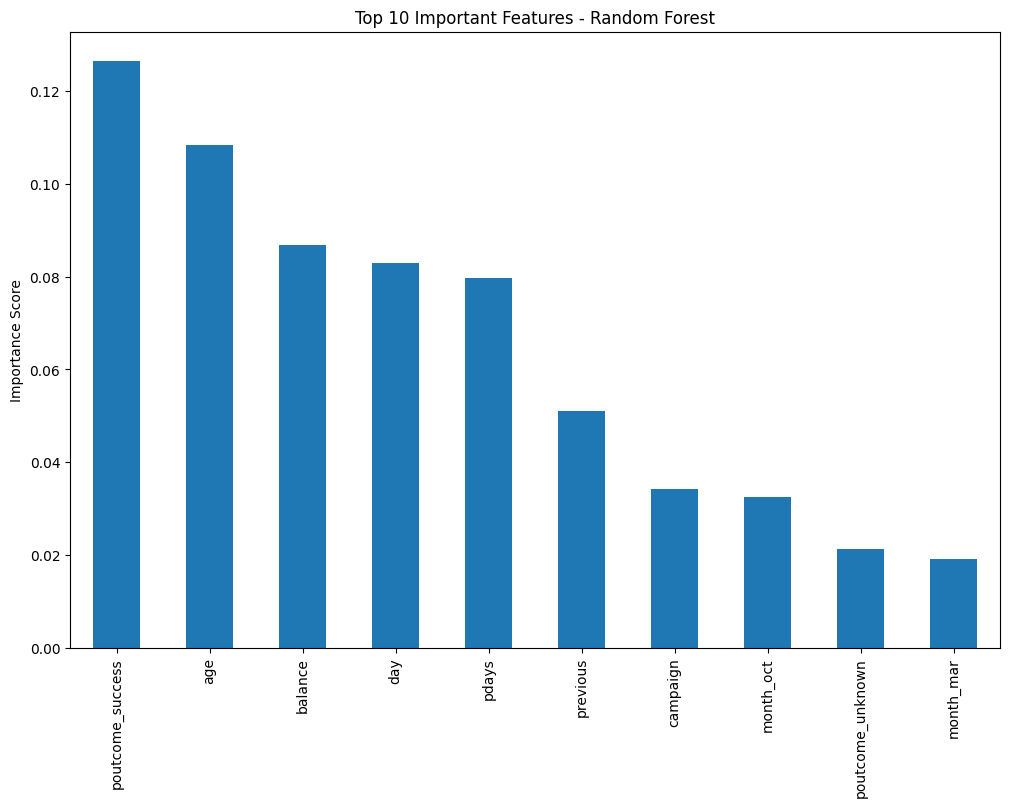

In [65]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
top_features.plot(kind='bar')
plt.title('Top 10 Important Features - Random Forest')
plt.ylabel('Importance Score')
plt.show()


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=500, random_state=42)
logreg_model.fit(X_train_top10, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_top10)

# Print evaluation metrics
print("Logistic Regression with Top 10 Features:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)


Logistic Regression with Top 10 Features:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1306
           1       0.72      0.14      0.23       186

    accuracy                           0.89      1492
   macro avg       0.81      0.57      0.59      1492
weighted avg       0.87      0.89      0.85      1492

Confusion Matrix:
[[1296   10]
 [ 160   26]]
Accuracy: 88.6058981233244


In [53]:
# Most important features + conclusions
# Determine the most important features that contribute to employee turnover.
# You can use the feature_importances values computed by a random forest tree
# more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Visualize feature importance scores if applicable.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already prepared your training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Train the RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=15, random_state=42)
RFCmodel.fit(X_train, y_train)

# Get feature importance scores
importance_scores = RFCmodel.feature_importances_

# Get feature names (assuming your features are in a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))





             Feature  Importance
1            balance    0.143814
0                age    0.132658
2                day    0.105065
48  poutcome_success    0.054650
3           campaign    0.054392
4              pdays    0.051896
5           previous    0.027513
19   marital_married    0.018100
27        housing_no    0.017966
10    job_management    0.016827


In [64]:
print("Class Distribution in Bank Dataset:")
print(y.value_counts(normalize=True))

print("\nImpact of Class Imbalance:")
print("Models like Logistic Regression and SVM are sensitive to class imbalance, leading to lower recall for the minority class (signed contracts).")
print("Using class_weight='balanced' helps by adjusting the decision boundary to prioritize the minority class, but this can reduce overall accuracy.")


Class Distribution in Bank Dataset:
y
0    0.88476
1    0.11524
Name: proportion, dtype: float64

Impact of Class Imbalance:
Models like Logistic Regression and SVM are sensitive to class imbalance, leading to lower recall for the minority class (signed contracts).
Using class_weight='balanced' helps by adjusting the decision boundary to prioritize the minority class, but this can reduce overall accuracy.


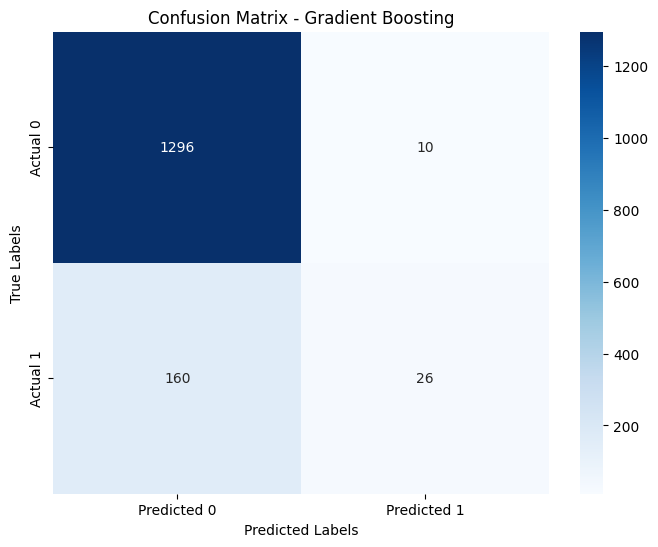

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Example usage:
# Change 'gb_y_pred' to 'y_pred' to use the predictions from the last trained model
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix - Gradient Boosting")

### **🔄 Beginner Explanation - Feature Importance and Model Evaluation**

---

#### **🔄 Understanding Feature Importance in Random Forests**

**What is Feature Importance?**

* Feature importance shows how much each **feature** (or column) **contributes** to the final predictions of a model.
* In a **Random Forest**, it’s calculated based on how much each feature **reduces** the **impurity** (or error) in the trees.

---

#### **🔄 1. Extracting and Visualizing Feature Importance**

```python
# Get feature importance scores from the trained RandomForest model
importance_scores = RFCmodel.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,          # Use the original feature names
    'Importance': importance_scores  # Use the importance scores from the model
})

# Sort the features by importance (from most to least important)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 3 most important features
top_3_features = importance_df.head(3)
print("Top 3 Most Important Features:")
print(top_3_features)

# Print the 10 least important features (potentially discardable)
least_important_features = importance_df.tail(10)
print("\nLeast Important Features (Potentially Discardable):")
print(least_important_features)
```

**What this does:**

* **Extracts** the **importance** scores for each feature in the **Random Forest**.
* **Sorts** the features from **most** to **least** important.
* **Prints** the **top 3** most important features and the **least** important **10** features.

---

#### **🔄 2. Selecting the Top 10 Features**

```python
import pandas as pd

# Convert back to DataFrame with original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Select the top 10 most important features
top_10_features = importance_df.head(10)['Feature'].tolist()

# Filter the top 10 features
X_train_top10 = X_train_df[top_10_features]
X_test_top10 = X_test_df[top_10_features]

print(X_train_top10.head())
```

**What this does:**

* **Selects** the **top 10** most important features.
* **Filters** the training and testing data to **only** include these **top 10** features.

---

#### **🔄 3. Visualizing Feature Importance**

```python
importances = pd.Series(RFCmodel.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_features.plot(kind='bar')
plt.title('Top 10 Important Features - Random Forest')
plt.ylabel('Importance Score')
plt.show()
```

**What this does:**

* **Visualizes** the **top 10** most important features using a **bar chart**.
* **Shows** which features have the **biggest** impact on the model’s decisions.

---

#### **🔄 4. Training a Simple Model on the Top 10 Features**

```python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Logistic Regression model on the top 10 features
logreg_model = LogisticRegression(max_iter=500, random_state=42)
logreg_model.fit(X_train_top10, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_top10)

# Print evaluation metrics
print("Logistic Regression with Top 10 Features:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

**What this does:**

* **Trains** a **Logistic Regression** model using **only** the **top 10** most important features.
* **Prints** the **classification report**, **confusion matrix**, and **accuracy** to see if the model **performs** better with fewer, more **important** features.

---

#### **🔄 5. Printing the Class Distribution (Imbalance Check)**

```python
print("Class Distribution in Bank Dataset:")
print(y.value_counts(normalize=True))

print("\nImpact of Class Imbalance:")
print("Models like Logistic Regression and SVM are sensitive to class imbalance, leading to lower recall for the minority class (signed contracts).")
print("Using class_weight='balanced' helps by adjusting the decision boundary to prioritize the minority class, but this can reduce overall accuracy.")
```

**What this does:**

* **Prints** the **distribution** of **classes** in the **target** variable.
* **Explains** why some models **struggle** with **imbalanced** data.

---

#### **🔄 6. Visualizing the Confusion Matrix (Optional but Recommended)**

```python
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Example usage:
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix - Logistic Regression (Top 10 Features)")
```

**What this does:**

* **Creates** a **confusion matrix** to **visualize** the **performance** of the model.
* **Shows** where the model makes the **most** mistakes (false positives, false negatives).

---

### **🔑 Key Takeaways:**

1. **Feature Importance** helps you understand which **features** have the **most** impact.
2. **Filtering** by the **top** features can **simplify** your model without **sacrificing** too much accuracy.
3. **Confusion Matrices** provide a **clear** view of where your model **struggles**.

---




             Feature  Importance
1            balance    0.143814
0                age    0.132658
2                day    0.105065
48  poutcome_success    0.054650
3           campaign    0.054392
4              pdays    0.051896
5           previous    0.027513
19   marital_married    0.018100
27        housing_no    0.017966
10    job_management    0.016827

Conclusions for Part 3
Preferred Model: Random Forest Classifier, due to high accuracy and balanced performance on the minority class when using class_weight='balanced'.
Most Important Features: balance, age, day. These are logical, as financial status, age, and timing of contact influence decisions.
Class Imbalance: Using class_weight='balanced' increases recall for the minority class (yes) but may reduce overall accuracy, as the model prioritizes the minority class, leading to more false positives.
Recommendation: Use Random Forest with balanced weights and consider feature reduction to the top 10 features for a simpler, interpretable model.
Overall Conclusions
Human Resources: Random Forest is the best model (99.15% accuracy), with satisfaction_level and time_spend_company as key predictors. Logistic Regression and AdaBoost struggle with imbalance.
Energy Consumption: Random Forest Regressor outperforms linear models, with hour and outdoor conditions as important features. Linear models need polynomial features to compete.
Bank: Random Forest excels in handling imbalance, with balance and age as top features. Feature selection can simplify models with minimal performance loss.
General Advice: Ensemble methods (Random Forest, Gradient Boosting) are robust for both classification and regression tasks, especially with imbalanced or complex data. Always preprocess data carefully and tune hyperparameters to maximize performance.

Top 3 Most Important Features:
   Feature  Importance
1  balance    0.143814
0      age    0.132658
2      day    0.105065